# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6+ syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt

**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [2]:
# Cell type : CodeWrite

def pdf_multivariate_gaussian(X, mu, cov):
    """Computes the probability density function of the multivariate Gaussian distribution.

    Arguments:
    X : numpy array of shape (d,)
    mu: numpy array of shape (d,)
    cov: numpy array of shape (d,d)

    Returns:
    p : probability density function of the multivariate Gaussian distribution

    """
    assert(X.shape == mu.shape) # check if the dimensions of X and mu are same
    assert(cov.shape[0] == cov.shape[1]) # check if cov is a square matrix

    twoPi = 2 * np.pi
    n = X.shape[0]
    detCov = np.linalg.det(cov)
    assert(detCov != 0) # check if the determinant of cov is non-zero
    const = 1/(np.sqrt(twoPi**n * detCov))
    powerTerm = -0.5 * np.matmul(np.matmul((X-mu).T, np.linalg.inv(cov)), (X-mu))
    return const * np.exp(powerTerm)

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    # Getting the training data for positive and negative classes
    X_train_pos = X_train[Y_train == 1]
    X_train_neg = X_train[Y_train == -1]
    # Getting the probability of the positive class and the means of the positive and negative classes
    pos_count = X_train_pos.shape[0]
    a = pos_count / X_train.shape[0]
    mu_pos = np.mean(X_train_pos, axis=0)
    mu_neg = np.mean(X_train_neg, axis=0)
    # Getting the covariance matrix
    cov = np.eye(X_train.shape[1])
    # Getting the probability of the positive and negative classes
    prob_pos = np.array([pdf_multivariate_gaussian(X_test[i], mu_pos, cov) for i in range(X_test.shape[0])])
    prob_neg = np.array([pdf_multivariate_gaussian(X_test[i], mu_neg, cov) for i in range(X_test.shape[0])])
    # Predicting the class of the test data
    Y_test_pred = np.array([1 if prob_pos[i] * a > prob_neg[i] * (1-a) else -1 for i in range(X_test.shape[0])])
    return Y_test_pred
    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    # Getting the training data for positive and negative classes
    X_train_pos = X_train[Y_train == 1]
    X_train_neg = X_train[Y_train == -1]
    # Getting the probability of the positive class and the means of the positive and negative classes
    pos_count = X_train_pos.shape[0]
    a = pos_count / X_train.shape[0]
    mu_pos = np.mean(X_train_pos, axis=0)
    mu_neg = np.mean(X_train_neg, axis=0)
    # Getting the covariance matrix
    cov = np.zeros((X_train.shape[1], X_train.shape[1]))
    for i in range(X_train.shape[0]):
        temp1 = np.array([X_train[i] - mu_pos])
        temp2 = np.array([X_train[i] - mu_neg])
        if Y_train[i] == 1:
            cov += np.matmul(np.transpose(temp1), temp1)
        else:
            cov += np.matmul(np.transpose(temp2), temp2)
    cov /= X_train.shape[0]
    # Getting the probability of the positive and negative classes
    prob_pos = np.array([pdf_multivariate_gaussian(X_test[i], mu_pos, cov) for i in range(X_test.shape[0])])
    prob_neg = np.array([pdf_multivariate_gaussian(X_test[i], mu_neg, cov) for i in range(X_test.shape[0])])
    # Predicting the class of the test data
    Y_test_pred = np.array([1 if prob_pos[i] * a > prob_neg[i] * (1-a) else -1 for i in range(X_test.shape[0])])
    return Y_test_pred

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    # Getting the training data for positive and negative classes
    X_train_pos = X_train[Y_train == 1]
    X_train_neg = X_train[Y_train == -1]
    # Getting the probability of the positive class and the means of the positive and negative classes
    pos_count = X_train_pos.shape[0]
    a = pos_count / X_train.shape[0]
    mu_pos = np.mean(X_train_pos, axis=0)
    mu_neg = np.mean(X_train_neg, axis=0)
    # Getting the covariance matrix
    cov_pos = np.zeros((X_train.shape[1], X_train.shape[1]))
    cov_neg = np.zeros((X_train.shape[1], X_train.shape[1]))
    for i in range(X_train.shape[0]): 
        temp1 = np.array([X_train[i] - mu_pos])
        temp2 = np.array([X_train[i] - mu_neg])
    
        if Y_train[i] == 1:
            cov_pos += np.matmul(np.transpose(temp1), temp1)
        else:
            cov_neg += np.matmul(np.transpose(temp2), temp2)
    cov_pos /= pos_count
    cov_neg /= (X_train.shape[0] - pos_count)
    # Getting the probability of the positive and negative classes
    prob_pos = np.array([pdf_multivariate_gaussian(X_test[i], mu_pos, cov_pos) for i in range(X_test.shape[0])])
    prob_neg = np.array([pdf_multivariate_gaussian(X_test[i], mu_neg, cov_neg) for i in range(X_test.shape[0])])
    # Predicting the class of the test data
    Y_test_pred = np.array([1 if prob_pos[i] * a > prob_neg[i] * (1-a) else -1 for i in range(X_test.shape[0])])
    return Y_test_pred

In [3]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 

X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
print("Accuracy 1a: ", np.sum(Y_pred_test_1a == Y_test)/Y_test.shape[0])
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
print("Accuracy 1b: ", np.sum(Y_pred_test_1b == Y_test)/Y_test.shape[0])
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)
print("Accuracy 1c: ", np.sum(Y_pred_test_1c == Y_test)/Y_test.shape[0])

Accuracy 1a:  0.863
Accuracy 1b:  0.8625
Accuracy 1c:  0.8635


**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


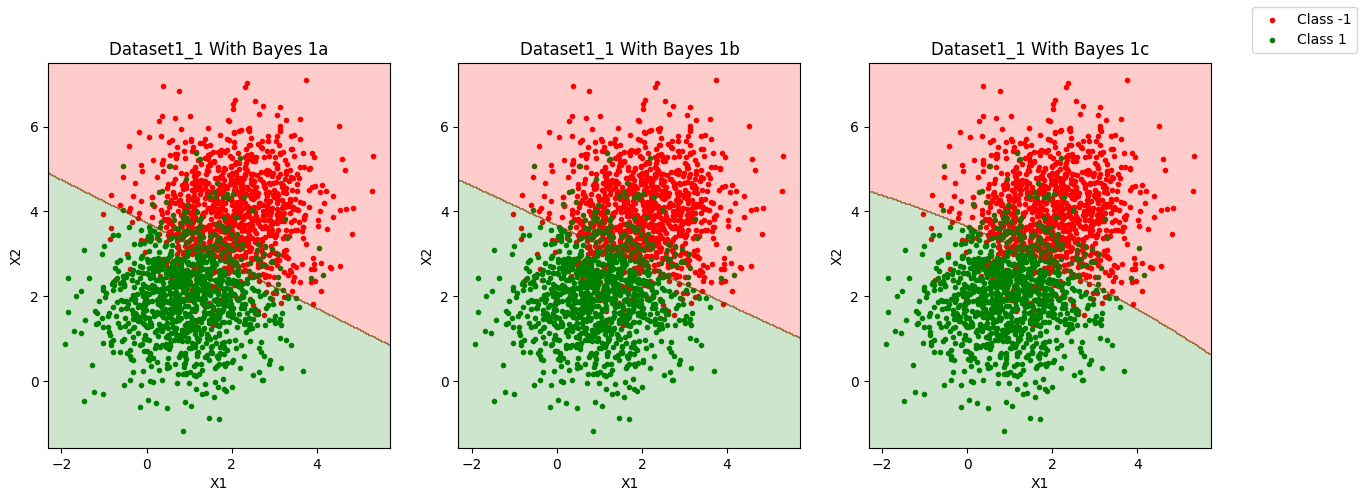

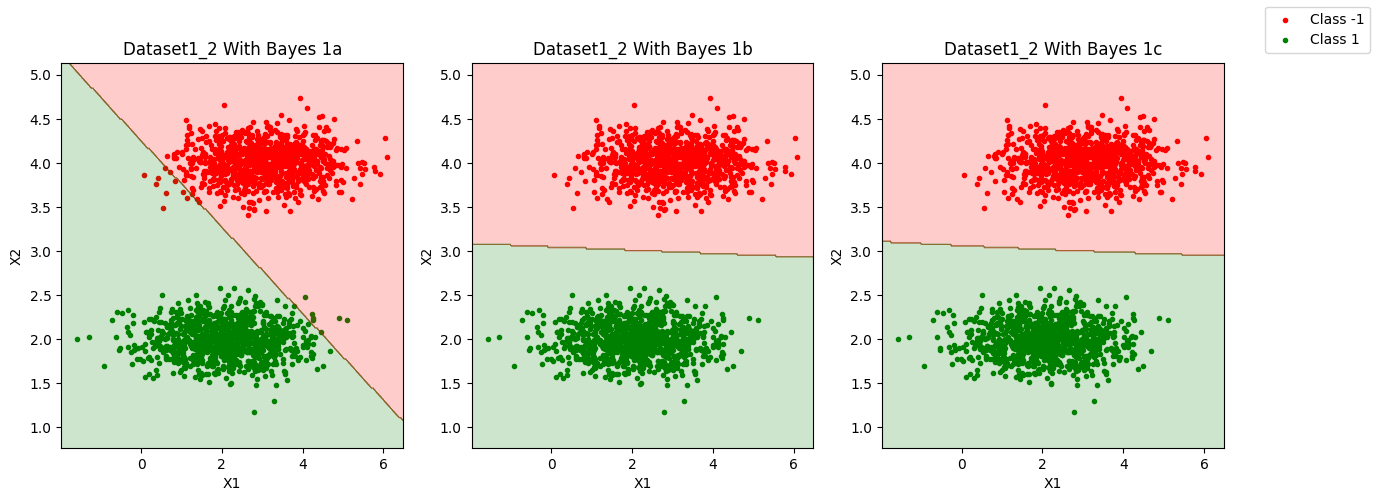

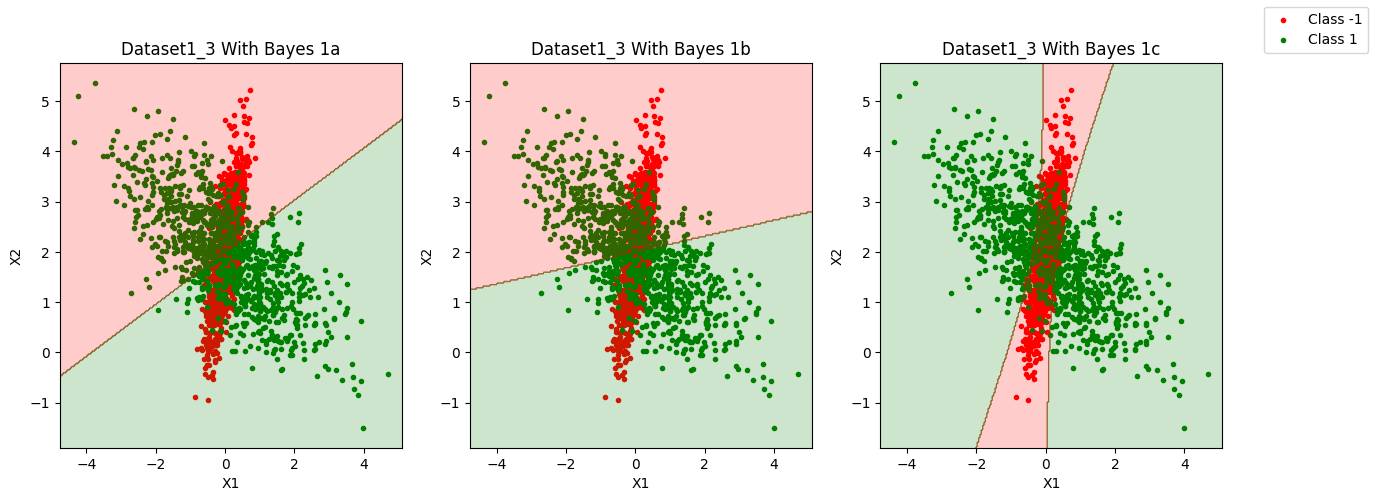

In [4]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

"""
NOTE: WILL TAKE 30-40 SECONDS TO RUN
"""
# Markers and colors for plotting
markers = ['.', '.']
colors = ['r', 'g'] # red for class -1, green for class 1

for i in range(1, 4):
    # Creating subplots and loading the data
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    filename = '../../Data/dataset1_' + str(i) + '.npz'
    data = np.load(filename)
    # Getting the training and test data
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    # Getting the predictions for the test data
    Y_test_pred1 = Bayes1a(X_train, Y_train, X_test)
    Y_test_pred2 = Bayes1b(X_train, Y_train, X_test)
    Y_test_pred3 = Bayes1c(X_train, Y_train, X_test)
    # Creating a grid of points for plotting the decision boundary
    max_X = np.max(X_train[:, 0])
    min_X = np.min(X_train[:, 0])
    max_Y = np.max(X_train[:, 1])
    min_Y = np.min(X_train[:, 1])
    size = 250
    X, Y = np.meshgrid(np.linspace(min_X-0.4, max_X+0.4, size), np.linspace(min_Y-0.4, max_Y+0.4, size))
    X_plotter = np.zeros((size**2, 2))
    for j in range(size):
        for k in range(size):
            X_plotter[j*size+k, 0] = X[j, k]
            X_plotter[j*size+k, 1] = Y[j, k]

    line = [0, 0]
    # Plotting Bayes1a decision making for the dataset
    ax[0].set_title("Dataset1_" + str(i) + " With Bayes 1a")
    for j in range(2):
        line[j] = ax[0].scatter(X_train[Y_train == 2*j-1, 0], X_train[Y_train == 2*j-1, 1], marker=markers[j], c=colors[j])
    
    Z = Bayes1a(X_train, Y_train, X_plotter)
    Z = Z.reshape(size, size)
    ax[0].set_xlabel("X1")
    ax[0].set_ylabel("X2")
    ax[0].contourf(X, Y, Z, colors=['r', 'g'], alpha=0.2)

    # Plotting Bayes1b decision making for the dataset
    ax[1].set_title("Dataset1_" + str(i) + " With Bayes 1b")
    for j in range(2):
        ax[1].scatter(X_train[Y_train == 2*j-1, 0], X_train[Y_train == 2*j-1, 1], marker=markers[j], c=colors[j])

    Z = Bayes1b(X_train, Y_train, X_plotter)
    Z = Z.reshape(size, size)
    ax[1].set_xlabel("X1")
    ax[1].set_ylabel("X2")
    ax[1].contourf(X, Y, Z, colors=['r', 'g'], alpha=0.2)

    # Plotting Bayes1c decision making for the dataset
    ax[2].set_title("Dataset1_" + str(i) + " With Bayes 1c")
    for j in range(2):
        ax[2].scatter(X_train[Y_train == 2*j-1, 0], X_train[Y_train == 2*j-1, 1], marker=markers[j], c=colors[j])

    Z = Bayes1c(X_train, Y_train, X_plotter)
    Z = Z.reshape(size, size)
    ax[2].set_xlabel("X1")
    ax[2].set_ylabel("X2")
    ax[2].contourf(X, Y, Z, colors=['r', 'g'], alpha=0.2)

    # Setting the legend and displaying the figure
    fig.legend(line, ["Class -1", "Class 1"], loc='upper right')
    plt.show()


** Cell type : TextWrite ** 

# Problem 1
## Error Table
| Dataset | Bayes1a | Bayes1b | Bayes1c |
|---------|---------|---------|---------|
| 1_1     |  0.126  |  0.1245 |  0.1245 |
| 1_2     |  0.0085 |   0.0   |   0.0   |
| 1_3     |  0.497  |  0.495  |  0.135  |

## Observations
1. The Bayes1c classifier is the best among the 3 classifiers. It takes less number of assumptions and extracts all the information from the data itself. The only assumption in this algorithm is that the distribution for each class is gaussian in nature.

2. This classifier works well in the third dataset where the covariances of the 2 data classes are different, it also gives non-linear classification boundaries which are not possible in the Bayes 1a and 1b classifiers, thus, the other 2 classifiers fail to classify this data properly.

3. The Bayes1b classifier works better than the Bayes1a classifier in the second dataset where the covariances of the 2 data classes are same but not identity.

4. The Bayes1a classifier works better than the Bayes1b classifier in the first dataset where the covariances of the 2 data classes identity matrices. Even if we are able to find the covariance via Maximum Likelihood estimator, due to the randomness in the data we aren't able to get the same performance as the Bayes1a classifier in the dataset 1, but this is just due to the nature of these datasets and not due to the algorithm itself.

### Bayes1a < Bayes1b < Bayes1c



** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [5]:
# Cell type : CodeWrite
# Fill in functions in this cell

loss_matrix = np.array([[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]])

def pdf_multivariate_gaussian(X, mu, cov):
    """Computes the probability density function of the multivariate Gaussian distribution.

    Arguments:
    X : numpy array of shape (d,)
    mu: numpy array of shape (d,)
    cov: numpy array of shape (d,d)

    Returns:
    p : probability density function of the multivariate Gaussian distribution

    """
    assert(X.shape == mu.shape)
    assert(cov.shape[0] == cov.shape[1])

    twoPi = 2 * np.pi
    n = X.shape[0]
    detCov = np.linalg.det(cov)
    assert(detCov != 0)
    const = 1/(np.sqrt(twoPi**n * detCov))
    powerTerm = -0.5 * np.matmul(np.matmul((X-mu).T, np.linalg.inv(cov)), (X-mu))
    return const * np.exp(powerTerm)

def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    # Separate the training data into 4 classes based on the labels
    X_train_arr = [X_train[Y_train == i] for i in range(1, 5)]
    # Computing the mean of each class
    mu_arr = [np.mean(X_train_arr[i], axis=0) for i in range(4)]
    # Computing the probability of each class
    prob_arr = [X_train_arr[i].shape[0]/X_train.shape[0] for i in range(4)]
    # Computing the covariance matrix
    cov = np.eye(X_train.shape[1])
    # Computing the prediction for each test instance
    Y_test_pred = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        error = [0, 0, 0, 0]
        for j in range(4):
            # Error is summation of loss matrix value * probability of class * pdf of the multivariate gaussian
            for k in range(4):
                error[j] += loss_matrix[j, k] * pdf_multivariate_gaussian(X_test[i], mu_arr[k], cov) * prob_arr[k]
        Y_test_pred[i] = np.argmin(error) + 1
    return Y_test_pred
    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    # Separate the training data into 4 classes based on the labels
    X_train_arr = [X_train[Y_train == i] for i in range(1, 5)]
    # Computing the mean of each class
    mu_arr = [np.mean(X_train_arr[i], axis=0) for i in range(4)]
    # Computing the probability of each class
    prob_arr = [X_train_arr[i].shape[0]/X_train.shape[0] for i in range(4)]
    # Computing the covariance matrix
    cov = np.zeros((X_train.shape[1], X_train.shape[1]))
    for i in range(X_train.shape[0]):
        temp = np.array([X_train[i] - mu_arr[int(Y_train[i])-1]])
        cov += np.matmul(np.transpose(temp), temp)
    cov /= X_train.shape[0]
    # Computing the prediction for each test instance
    Y_test_pred = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        error = [0, 0, 0, 0]
        # Error is summation of loss matrix value * probability of class * pdf of the multivariate gaussian
        for j in range(4):   
            for k in range(4):
                error[j] += loss_matrix[k][j] * prob_arr[k] * pdf_multivariate_gaussian(X_test[i], mu_arr[k], cov)
        Y_test_pred[i] = np.argmin(error) + 1
    return Y_test_pred

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    # Separate the training data into 4 classes based on the labels
    X_train_arr = [X_train[Y_train == i] for i in range(1, 5)]
    # Computing the mean of each class
    mu_arr = [np.mean(X_train_arr[i], axis=0) for i in range(4)]
    # Computing the probability of each class
    prob_arr = [X_train_arr[i].shape[0]/X_train.shape[0] for i in range(4)]
    # Computing the covariance matrix for each class
    cov = []
    for i in range(4):
        cov.append(np.zeros((X_train.shape[1], X_train.shape[1])))
        for j in range(X_train_arr[i].shape[0]):
            temp = np.array([X_train_arr[i][j] - mu_arr[i]])
            cov[i] += np.matmul(np.transpose(temp), temp)
        cov[i] /= X_train_arr[i].shape[0]
    # Computing the prediction for each test instance
    Y_test_pred = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        error = [0, 0, 0, 0]
        # Error is summation of loss matrix value * probability of class * pdf of the multivariate gaussian
        for j in range(4):   
            for k in range(4):
                error[j] += loss_matrix[k][j] * prob_arr[k] * pdf_multivariate_gaussian(X_test[i], mu_arr[k], cov[k])
                # Here we are using the covariance matrix of the each class
        Y_test_pred[i] = np.argmin(error) + 1
    return Y_test_pred

In [6]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))

X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))

Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)

print("Accuracy of Bayes2a: ", np.sum(Y_pred_test_2a == Y_test)/Y_test.shape[0])
print("Accuracy of Bayes2b: ", np.sum(Y_pred_test_2b == Y_test)/Y_test.shape[0])
print("Accuracy of Bayes2c: ", np.sum(Y_pred_test_2c == Y_test)/Y_test.shape[0])

Accuracy of Bayes2a:  0.69675
Accuracy of Bayes2b:  0.697
Accuracy of Bayes2c:  0.6985


**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


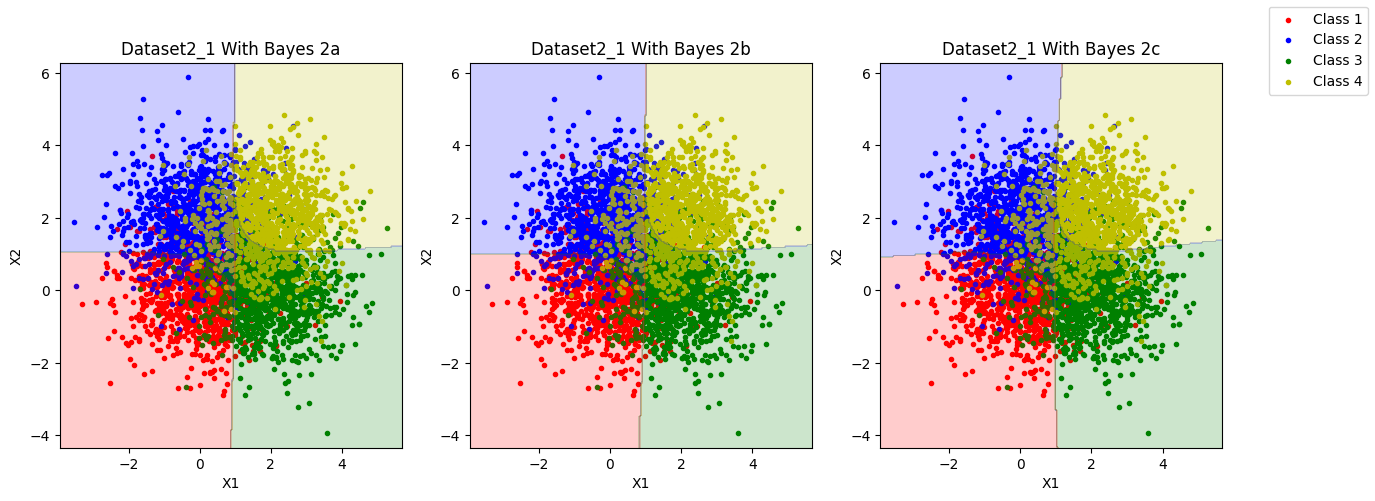

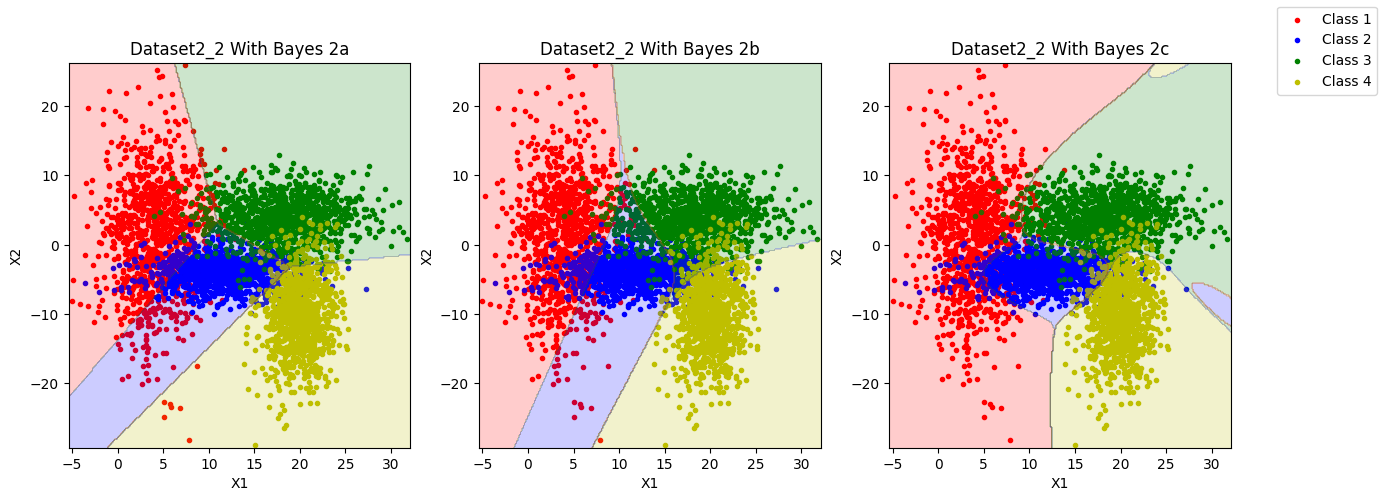

In [7]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

"""
NOTE: THIS TAKES 3-4 MINUTES TO RUN
"""
# The loss matrix
loss_matrix = np.array([[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]])

def getConfusionMatrix(Y_test, Y_pred):
    """ Returns the confusion matrix for the given test labels and predicted labels"""
    confusion_matrix = np.zeros((4, 4), dtype=int)
    for i in range(Y_test.shape[0]):
        confusion_matrix[int(Y_test[i])-1][int(Y_pred[i])-1] += 1
    return confusion_matrix

# Markers and colors for plotting
markers = ['.', '.', '.', '.']
colors = ['r', 'b', 'g', 'y'] # Red - Class 1, Blue - Class 2, Green - Class 3, Yellow - Class 4
# Initializing expected loss and confusion matrix
expected_loss_matrix = []
confusion_matrix_full = []

for i in range(1, 3):
    # Loading the dataset
    filename = '../../Data/dataset2_' + str(i) + '.npz'
    data = np.load(filename)
    # Getting the training and test data
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    # Predicting the labels for the test data
    Y_test_pred1 = Bayes2a(X_train, Y_train, X_test)
    Y_test_pred2 = Bayes2b(X_train, Y_train, X_test)
    Y_test_pred3 = Bayes2c(X_train, Y_train, X_test)
    # Computing the confusion matrix for each algorithm
    confusion_matrix = []
    confusion_matrix.append(getConfusionMatrix(Y_test, Y_test_pred1))
    confusion_matrix.append(getConfusionMatrix(Y_test, Y_test_pred2))
    confusion_matrix.append(getConfusionMatrix(Y_test, Y_test_pred3))
    confusion_matrix_full.append(confusion_matrix)
    # Computing the expected loss for each algorithm
    expected_loss = [0, 0, 0]
    for j in range(3):
        expected_loss[j] = np.sum(np.multiply(loss_matrix, confusion_matrix[j]))/Y_test.shape[0]
    expected_loss_matrix.append(expected_loss)
    # Creating the subplots
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    # Making a decision boundary plot for each algorithm
    size = 250
    max_X = np.max(X_train[:, 0])
    min_X = np.min(X_train[:, 0])
    max_Y = np.max(X_train[:, 1])
    min_Y = np.min(X_train[:, 1])
    X, Y = np.meshgrid(np.linspace(min_X-0.4, max_X+0.4, size), np.linspace(min_Y-0.4, max_Y+0.4, size))
    X_plotter = np.zeros((size**2, 2))
    for j in range(size):
        for k in range(size):
            X_plotter[j*size+k, 0] = X[j, k]
            X_plotter[j*size+k, 1] = Y[j, k]
    
    line = [0, 0, 0, 0]
    # Plotting the decision boundary for Bayes2a and scatterplot of training data
    ax[0].set_title("Dataset2_" + str(i) + " With Bayes 2a")
    for j in range(4):
        line[j] = ax[0].scatter(X_train[Y_train == j+1, 0], X_train[Y_train == j+1, 1], marker=markers[j], color=colors[j]) 

    Z = Bayes2a(X_train, Y_train, X_plotter)
    Z = Z.reshape((size, size))
    ax[0].set_xlabel("X1")
    ax[0].set_ylabel("X2")
    ax[0].contourf(X, Y, Z, alpha=0.2, colors=['r', 'g', 'b', 'y'])

    # Plotting the decision boundary for Bayes2b and scatterplot of training data
    ax[1].set_title("Dataset2_" + str(i) + " With Bayes 2b")
    for j in range(4):
        ax[1].scatter(X_train[Y_train == j+1, 0], X_train[Y_train == j+1, 1], marker=markers[j], color=colors[j])

    Z = Bayes2b(X_train, Y_train, X_plotter)
    Z = Z.reshape((size, size))
    ax[1].set_xlabel("X1")
    ax[1].set_ylabel("X2")
    ax[1].contourf(X, Y, Z, alpha=0.2, colors=['r', 'g', 'b', 'y'])

    # Plotting the decision boundary for Bayes2c and scatterplot of training data
    ax[2].set_title("Dataset2_" + str(i) + " With Bayes 2c")
    for j in range(4):
        ax[2].scatter(X_train[Y_train == j+1, 0], X_train[Y_train == j+1, 1], marker=markers[j], color=colors[j])

    Z = Bayes2c(X_train, Y_train, X_plotter)
    Z = Z.reshape((size, size))
    ax[2].set_xlabel("X1")
    ax[2].set_ylabel("X2")
    ax[2].contourf(X, Y, Z, alpha=0.2, colors=['r', 'g', 'b', 'y'])

    # Adding the legend and displaying the plot
    fig.legend(line, ['Class 1', 'Class 2', 'Class 3', 'Class 4'], loc='upper right')
    plt.show()

** Cell type : TextWrite ** 

# Problem 2
## Observations
1. The Bayes2c classifier is the best among the 3 classifiers. It takes less number of assumptions and extracts all the information from the data itself. The only assumption in this algorithm is that the distribution for each class is gaussian in nature.

2. This classifier works well in the second dataset where the covariances of the 4 data classes are different, it also gives non-linear classification boundaries which are not possible in the Bayes 2a and 2b classifiers, thus, the other 2 classifiers fail to classify this data as well as the Bayes2c classifier.
    
## Expected Loss Table
| Dataset | Bayes2a | Bayes2b | Bayes2c |
|---------|---------|---------|---------|
| 2_1     |0.42975  |0.429    |  0.42775|
| 2_2     |0.1835   |0.1895   |  0.14075|

## Confusion Table
Table Organised as follows: Rows are the true labels, columns are the predicted labels.

### Bayes2a -> Dataset 2_1
| True/Pred | 1 | 2 | 3 | 4 |
|------------|---|---|---|---|
| **1** | 633 | 219 | 136 | 12 |
| **2** | 97 | 738 | 62 | 103 |
| **3** | 86 | 49 | 770 | 95 |
| **4** | 15 | 136 | 194 | 655 |

### Bayes2b -> Dataset 2_1
| True/pred | 1 | 2 | 3 | 4 |
|------------|---|---|---|---|
| **1** | 633 | 218 | 137 | 12 |
| **2** | 95 | 743 | 60 | 102 |
| **3** | 84 | 49 | 773 | 94 |
| **4** | 16 | 137 | 196 | 651 |

### Bayes2c -> Dataset 2_1
| True/Pred | 1 | 2 | 3 | 4 |
|------------|---|---|---|---|
| **1** | 634 | 217 | 138 | 11 |
| **2** | 99 | 742 | 61 | 98 |
| **3** | 87 | 47 | 772 | 94 |
| **4** | 15 | 134 | 201 | 650 |

### Bayes2a -> Dataset 2_2
| True/Pred | 1 | 2 | 3 | 4 |
|------------|---|---|---|---|
| **1** | 830 | 150 | 18 | 2 |
| **2** | 93 | 784 | 46 | 77 |
| **3** | 30 | 61 | 905 | 4 |
| **4** | 0 | 23 | 78 | 899 |

### Bayes2b -> Dataset 2_2
| True/Pred | 1 | 2 | 3 | 4 |
|------------|---|---|---|---|
| **1** | 891 | 106 | 3 | 0 |
| **2** | 119 | 691 | 124 | 66 |
| **3** | 23 | 106 | 864 | 7 |
| **4** | 0 | 5 | 102 | 893 |

### Bayes2c -> Dataset 2_2
| True/Pred | 1 | 2 | 3 | 4 |
|------------|---|---|---|---|
| **1** | 901 | 80 | 19 | 0 |
| **2** | 64 | 824 | 46 | 66 |
| **3** | 19 | 31 | 936 | 14 |
| **4** | 0 | 36 | 48 | 916 |

## Misclassification Error Table
| Dataset | Bayes2a | Bayes2b | Bayes2c |
|---------|---------|---------|---------|
| 2_1     |  0.301  |   0.3   |  0.3005 |
| 2_2     |  0.1455 | 0.16525 | 0.10575 |

**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




Degree = 1 lambda = 1e-07
Bias = 0.23554719754855397
Variance = 0.0038974467577163334
MSE = 0.05937992903069384


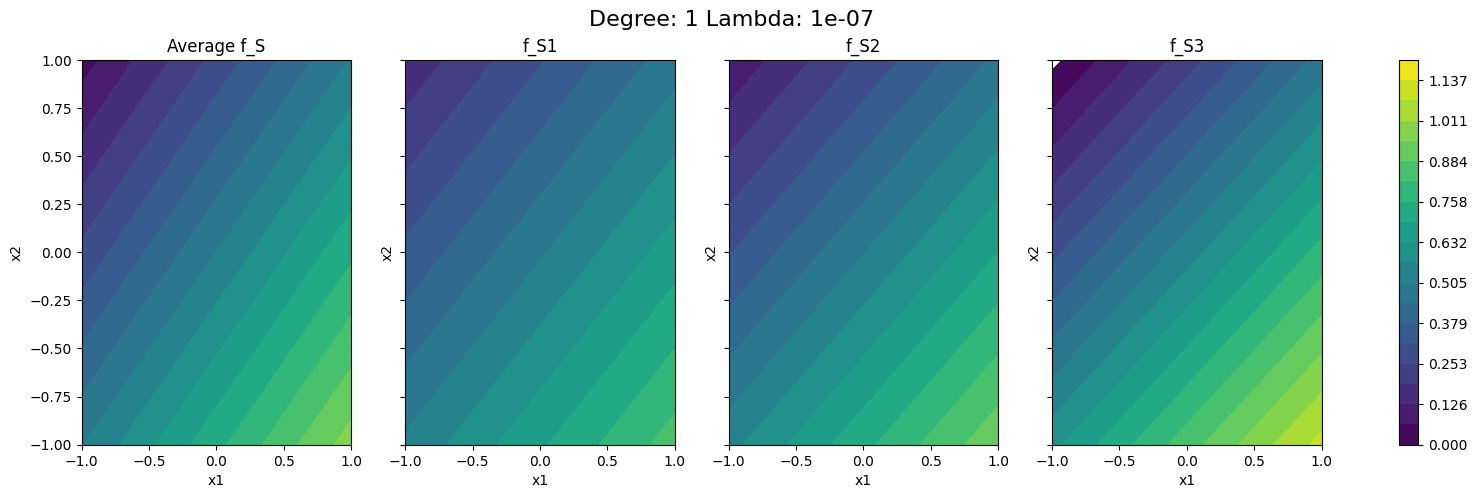

Degree = 1 lambda = 1e-05
Bias = 0.23478255327048977
Variance = 0.004007672085413707
MSE = 0.059130519405624075


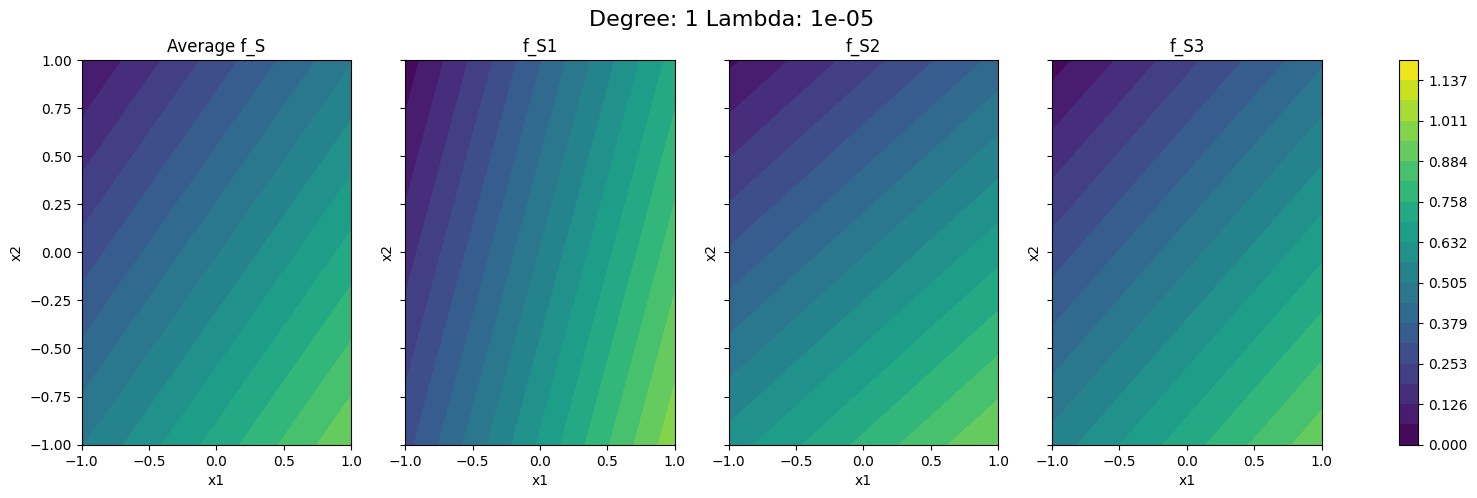

Degree = 1 lambda = 0.001
Bias = 0.23535254034795094
Variance = 0.003922018269379549
MSE = 0.05931283651761343


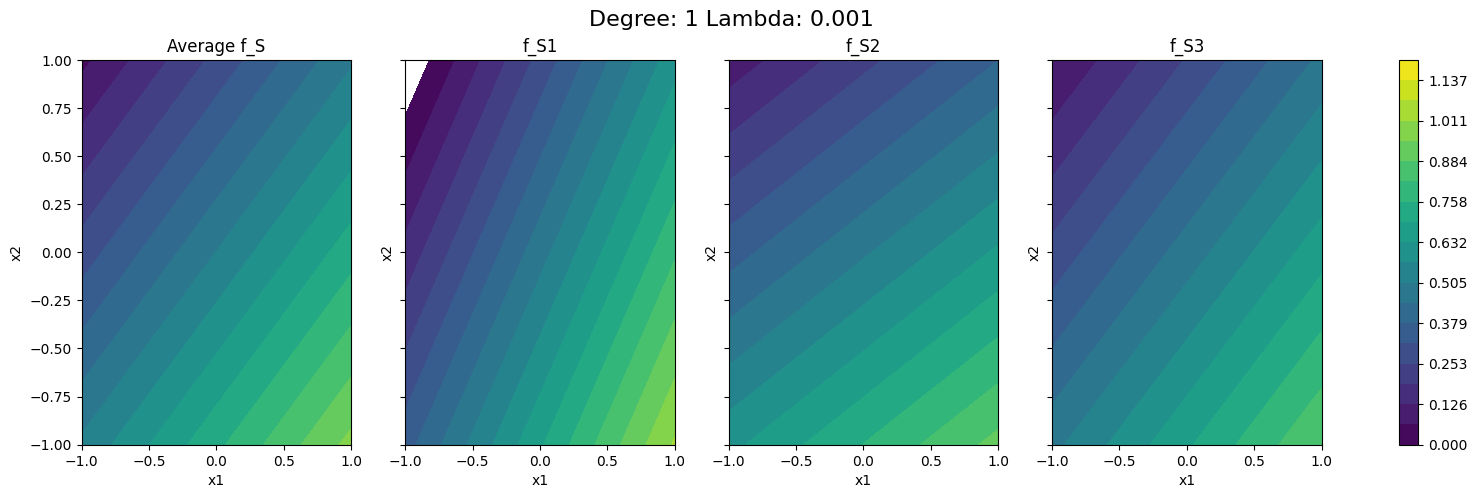

Degree = 1 lambda = 0.1
Bias = 0.23494920271991818
Variance = 0.0038501036131002864
MSE = 0.05905123147182549


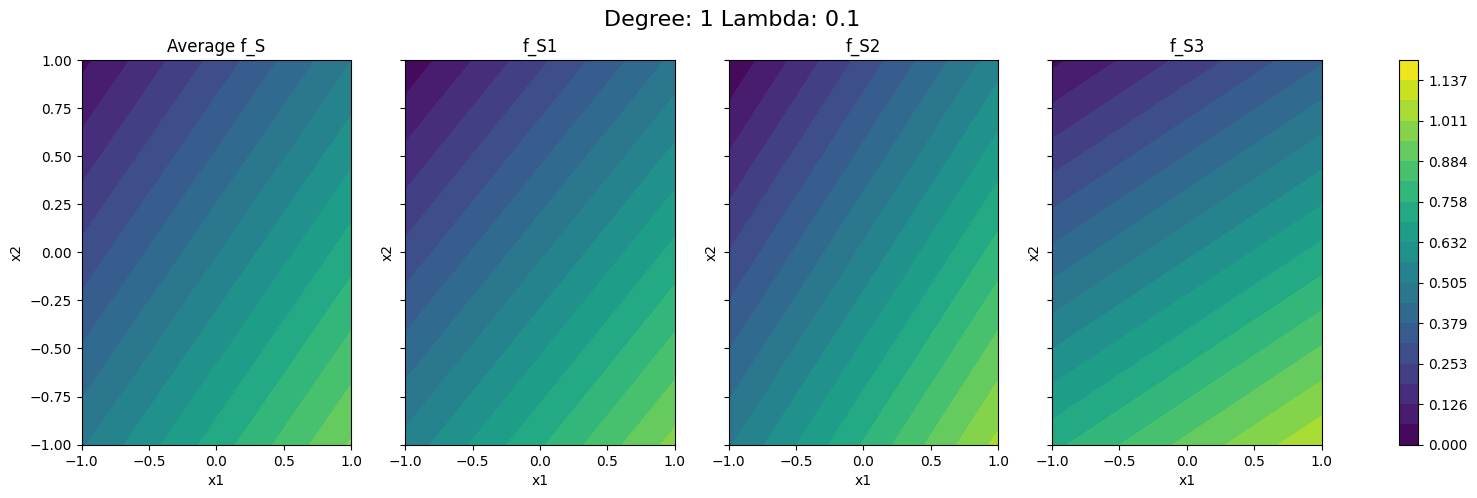

Degree = 1 lambda = 10.0
Bias = 0.25558174528723226
Variance = 0.0015623222756768
MSE = 0.06688435079974447


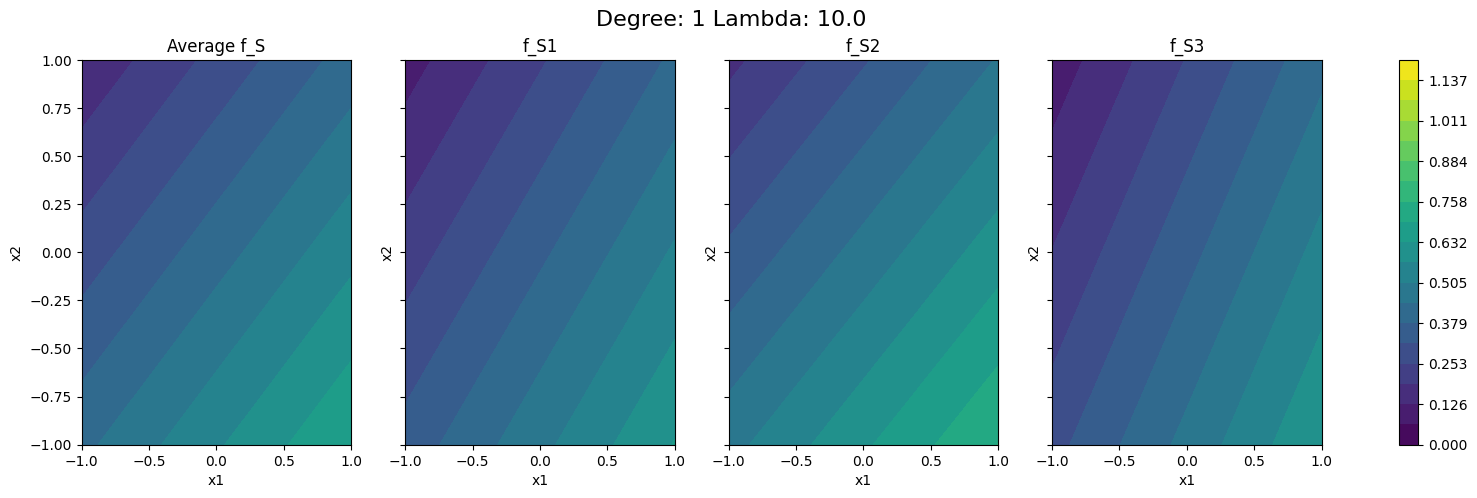

Degree = 1 lambda = 1000.0
Bias = 0.5544576130612696
Variance = 6.350844920677929e-06
MSE = 0.30742959552652127


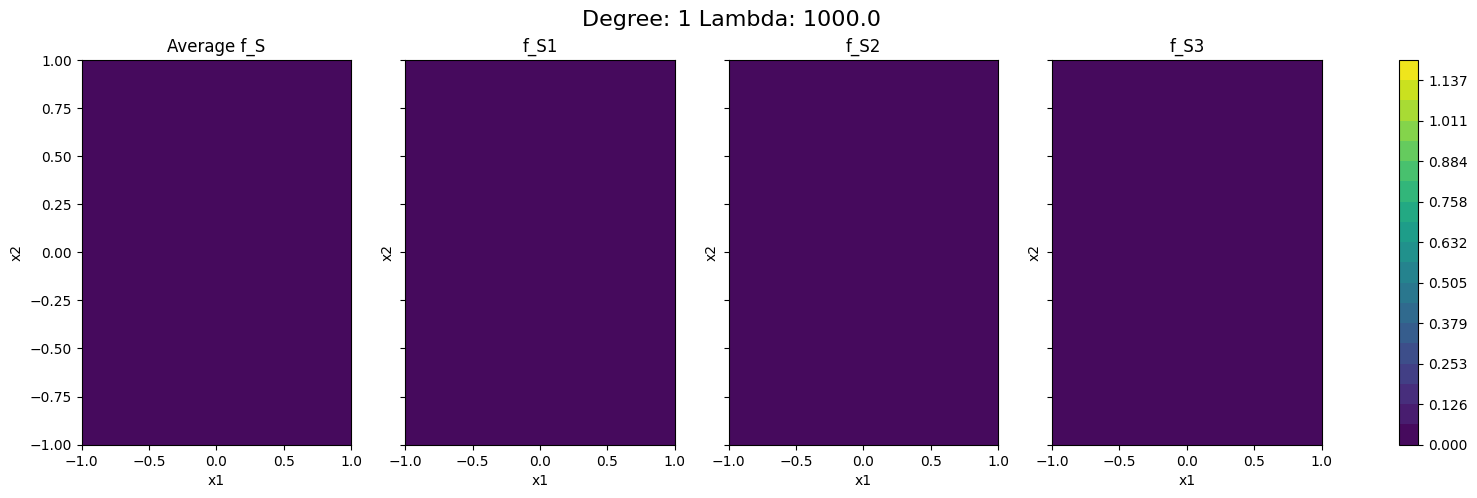

Degree = 2 lambda = 1e-07
Bias = 0.18668868844562533
Variance = 0.0050562109832233346
MSE = 0.039908877376771096


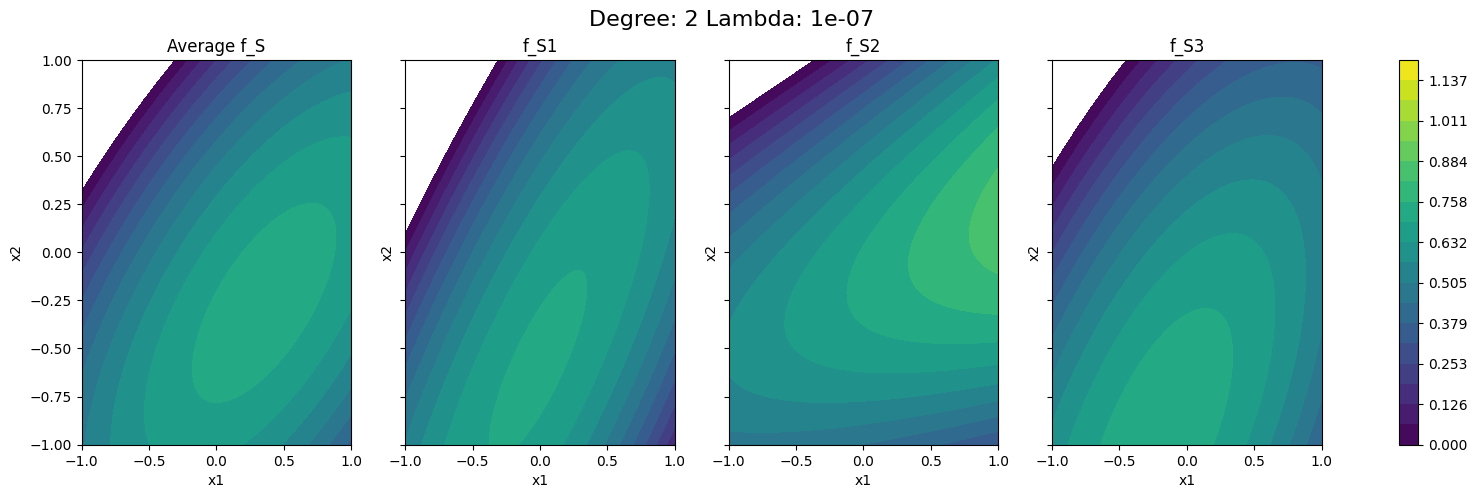

Degree = 2 lambda = 1e-05
Bias = 0.18670286650268697
Variance = 0.005724721958626178
MSE = 0.04058268231894633


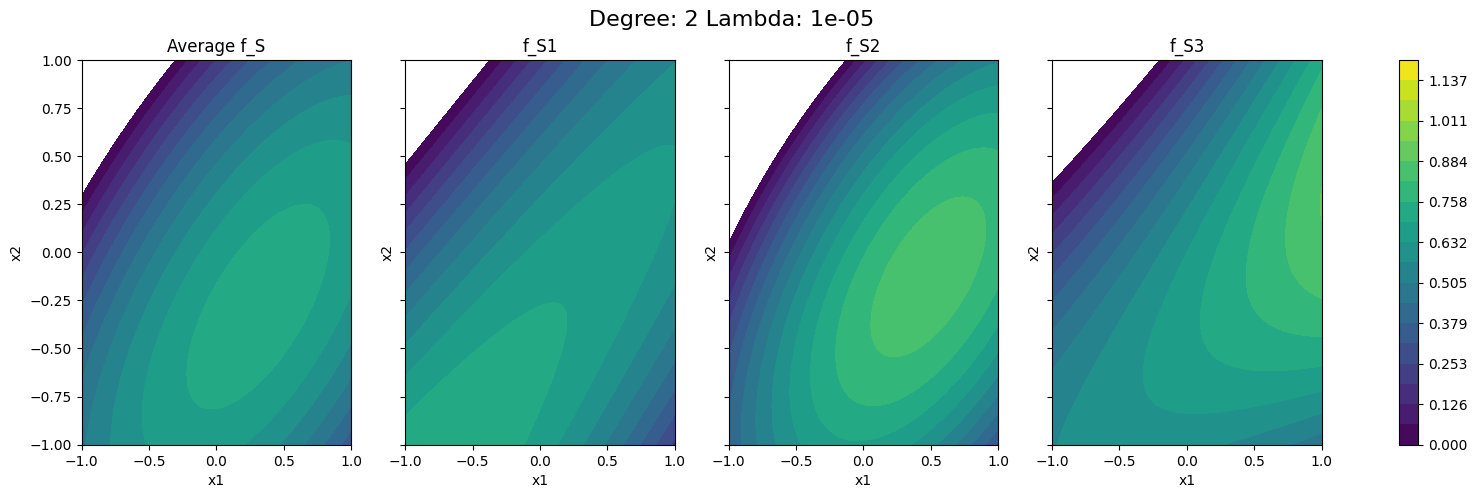

Degree = 2 lambda = 0.001
Bias = 0.18685050866687467
Variance = 0.005991910747492003
MSE = 0.040905023336561805


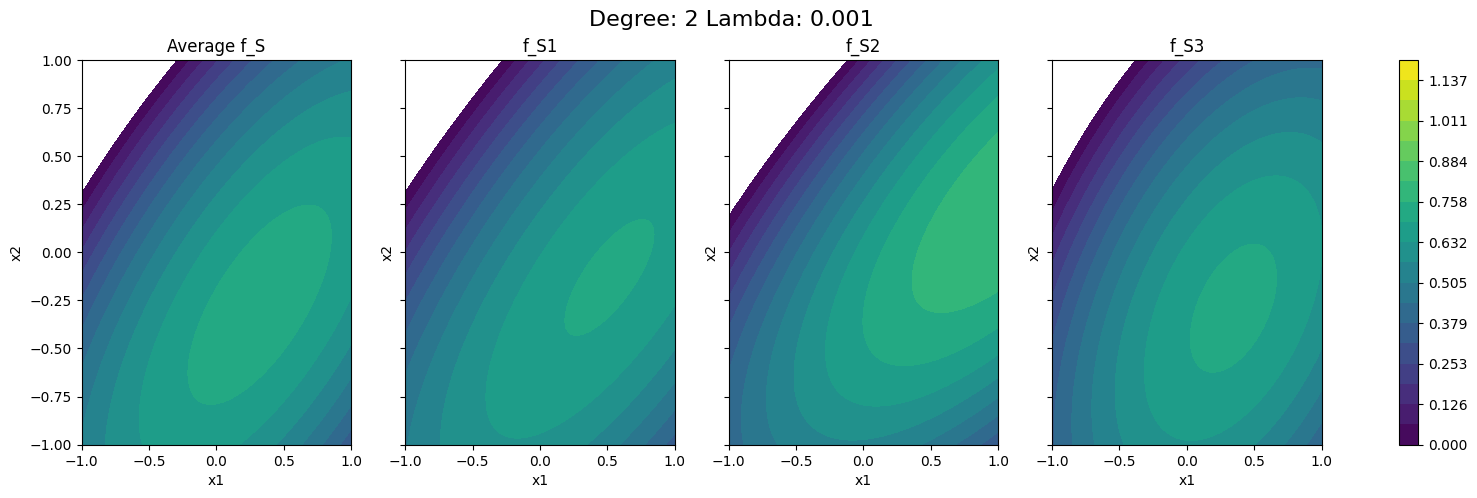

Degree = 2 lambda = 0.1
Bias = 0.186113601306755
Variance = 0.005014679424080232
MSE = 0.03965295201544999


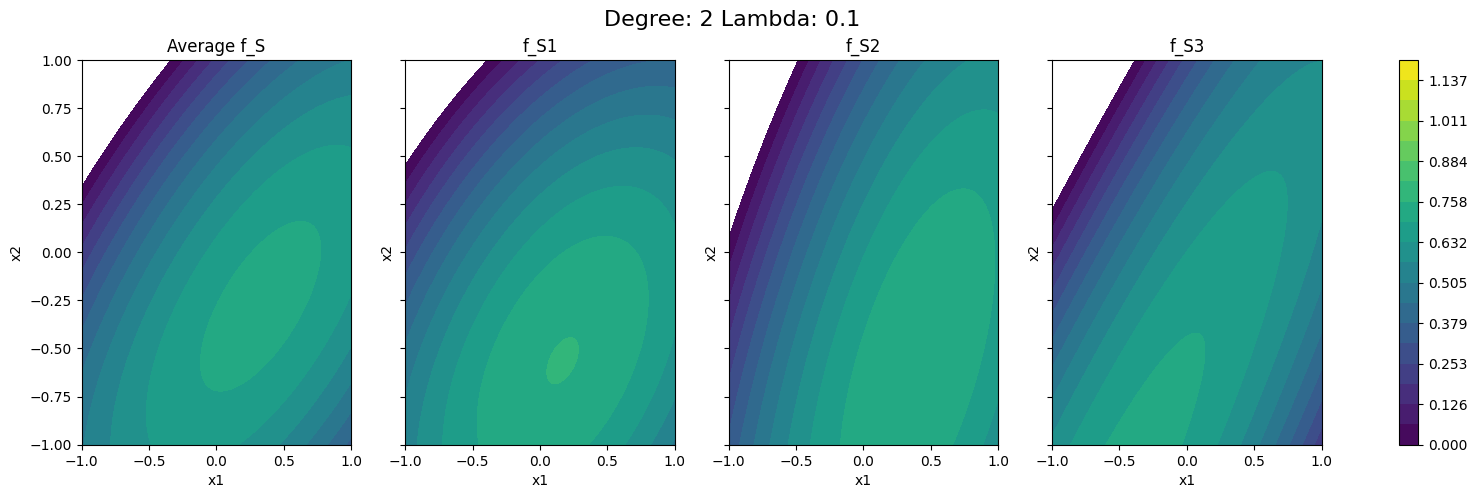

Degree = 2 lambda = 10.0
Bias = 0.2478739872179507
Variance = 0.00174059835900117
MSE = 0.06318211189832595


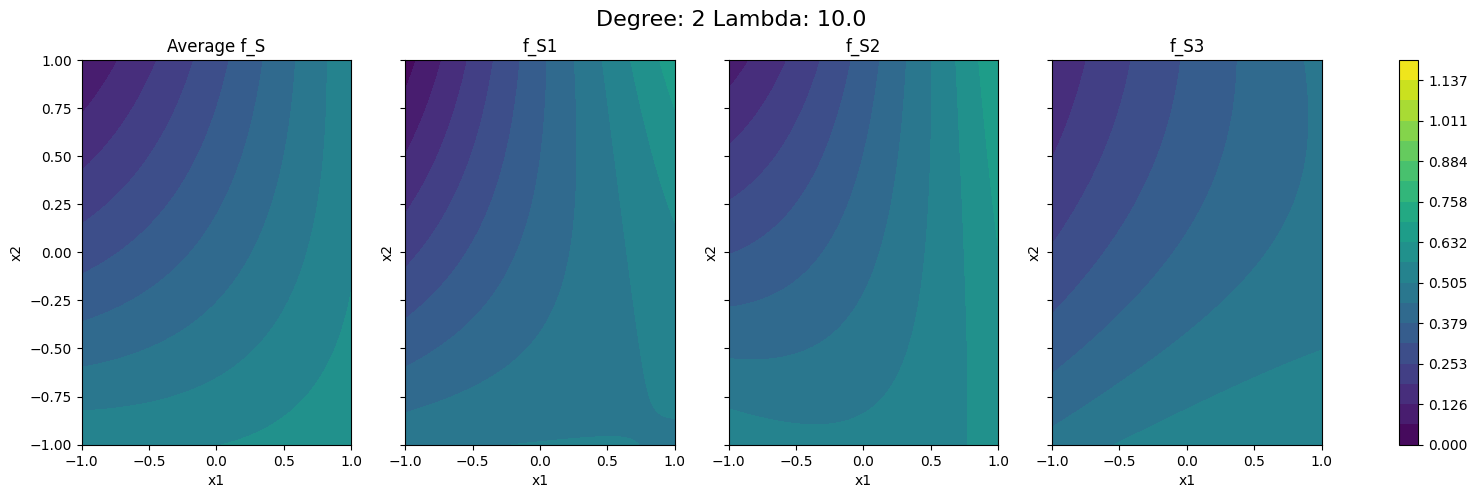

Degree = 2 lambda = 1000.0
Bias = 0.5509011510640607
Variance = 7.4347493219548685e-06
MSE = 0.30349951299302896


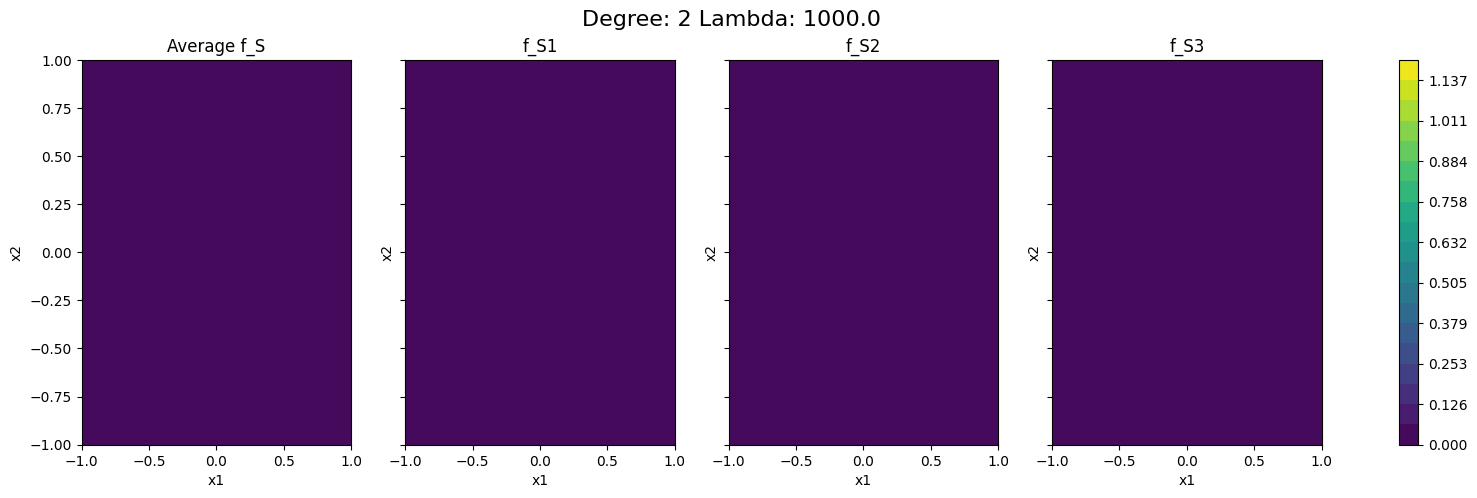

Degree = 4 lambda = 1e-07
Bias = 0.09544134259251695
Variance = 0.010301993272577852
MSE = 0.01941104314844004


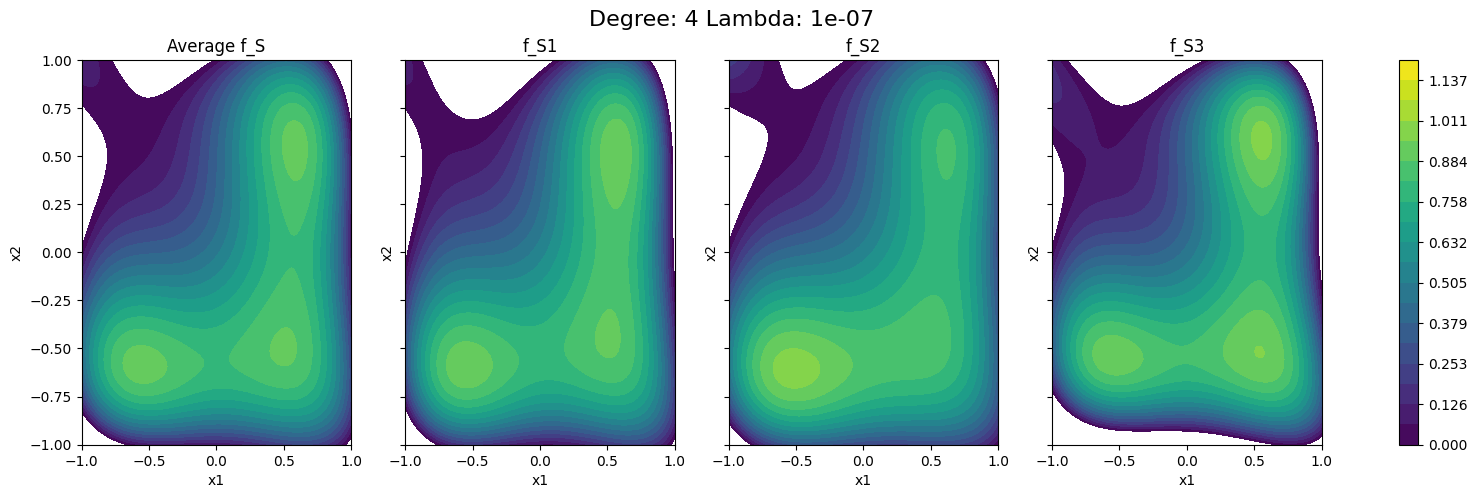

Degree = 4 lambda = 1e-05
Bias = 0.09246313573709376
Variance = 0.007527659928963774
MSE = 0.0160770913993


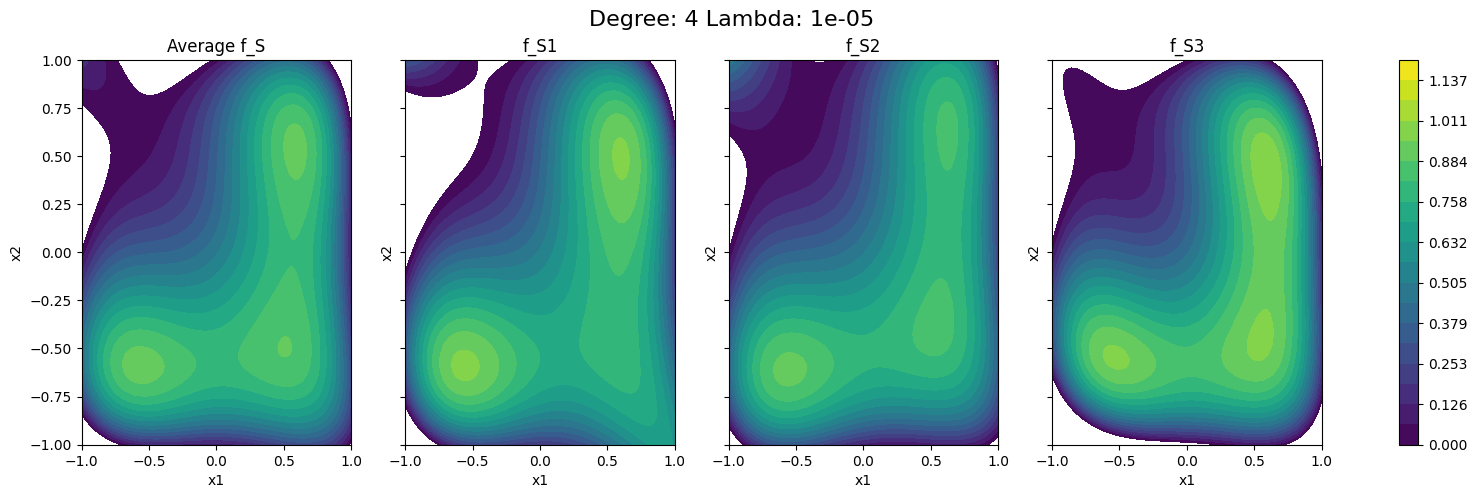

Degree = 4 lambda = 0.001
Bias = 0.0920083980884881
Variance = 0.01027097278051428
MSE = 0.01873651809932398


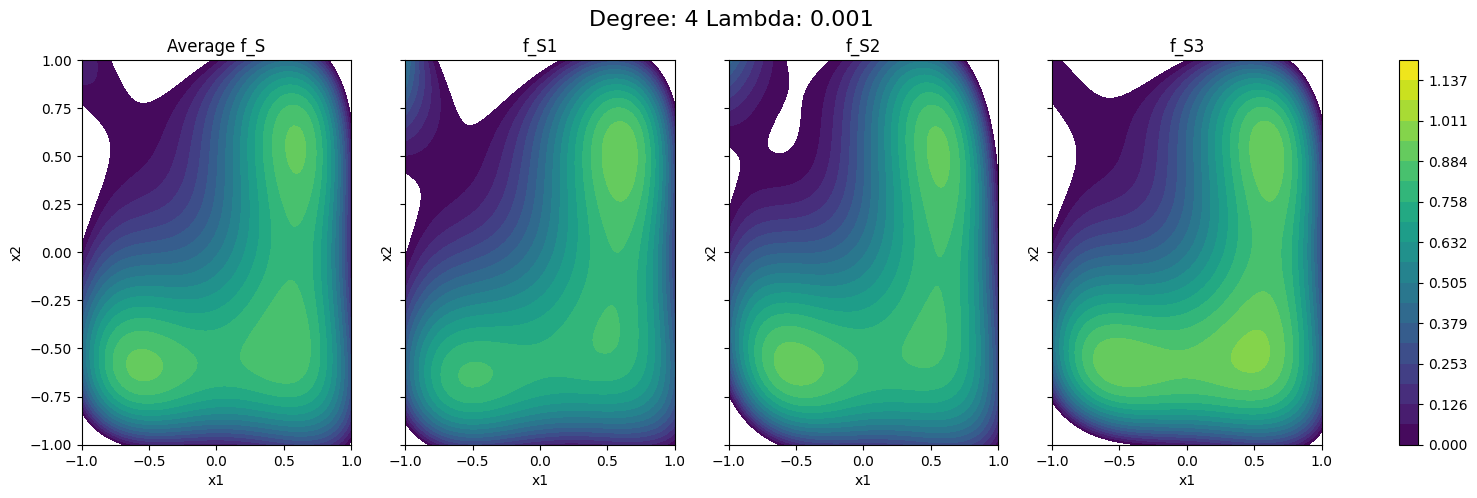

Degree = 4 lambda = 0.1
Bias = 0.09496571849162583
Variance = 0.004529642974325578
MSE = 0.013548130662956303


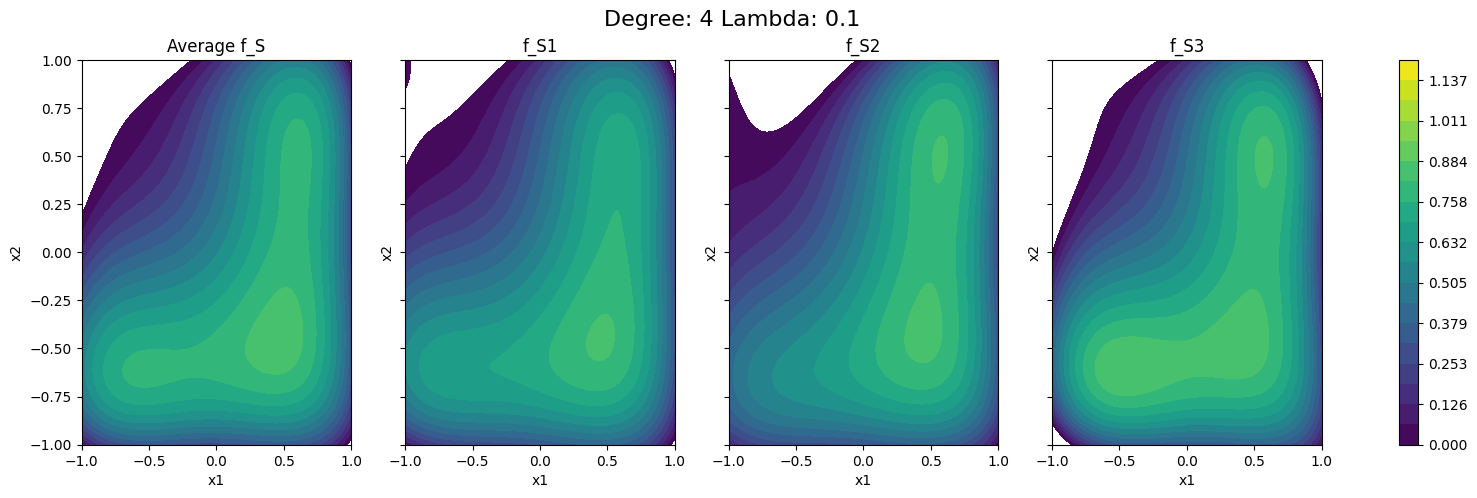

Degree = 4 lambda = 10.0
Bias = 0.24556936679841287
Variance = 0.0022994336729225497
MSE = 0.06260374758269599


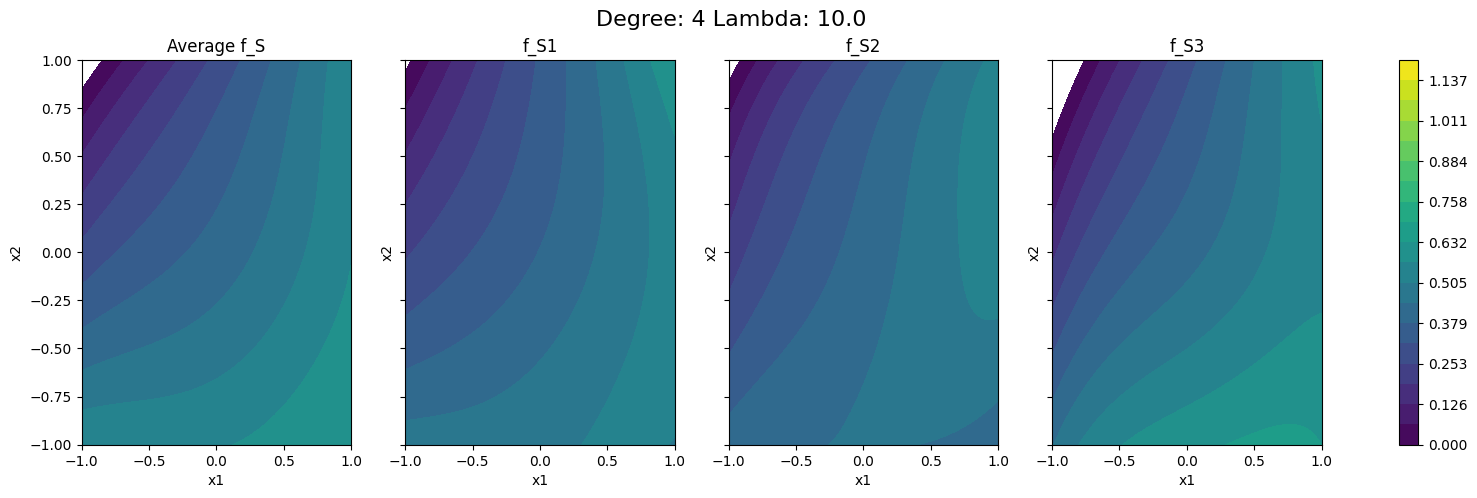

Degree = 4 lambda = 1000.0
Bias = 0.5500422756789987
Variance = 1.2098361287624897e-05
MSE = 0.3025586033954192


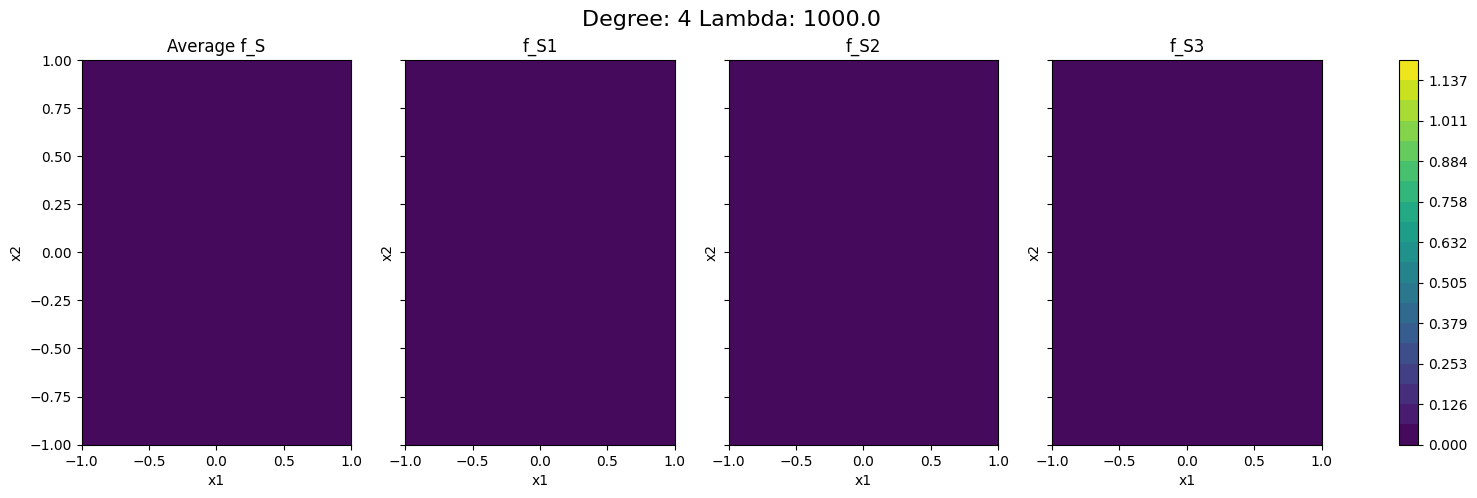

Degree = 8 lambda = 1e-07
Bias = 0.08081614703578278
Variance = 0.18804552244190373
MSE = 0.19457677206361298


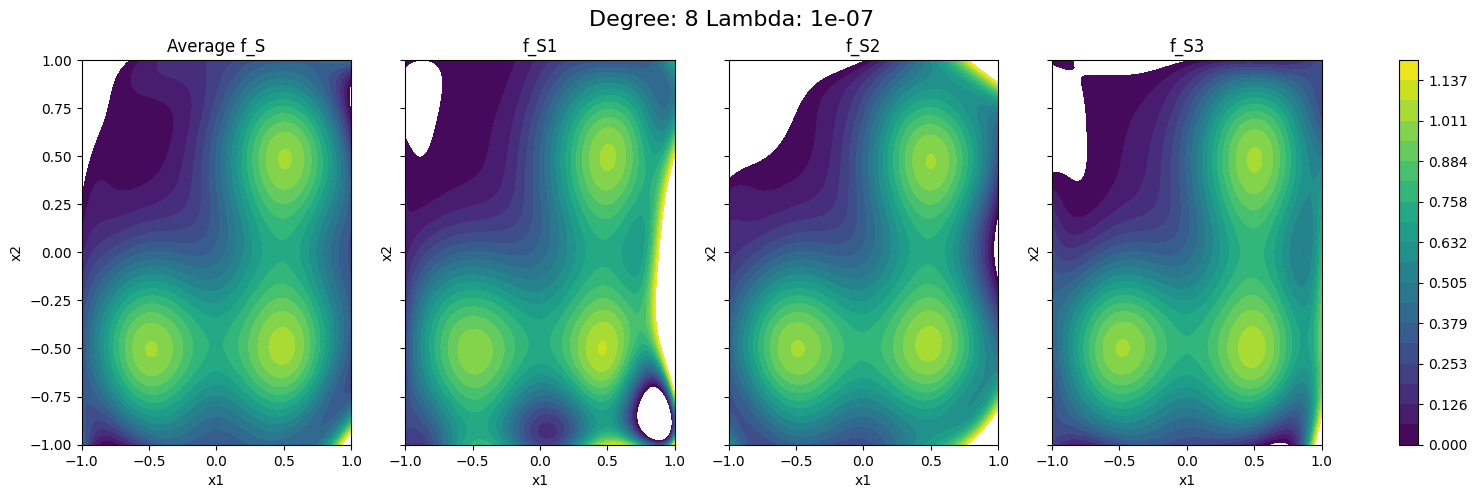

Degree = 8 lambda = 1e-05
Bias = 0.06346306269853712
Variance = 0.06333195144650751
MSE = 0.06735951177358596


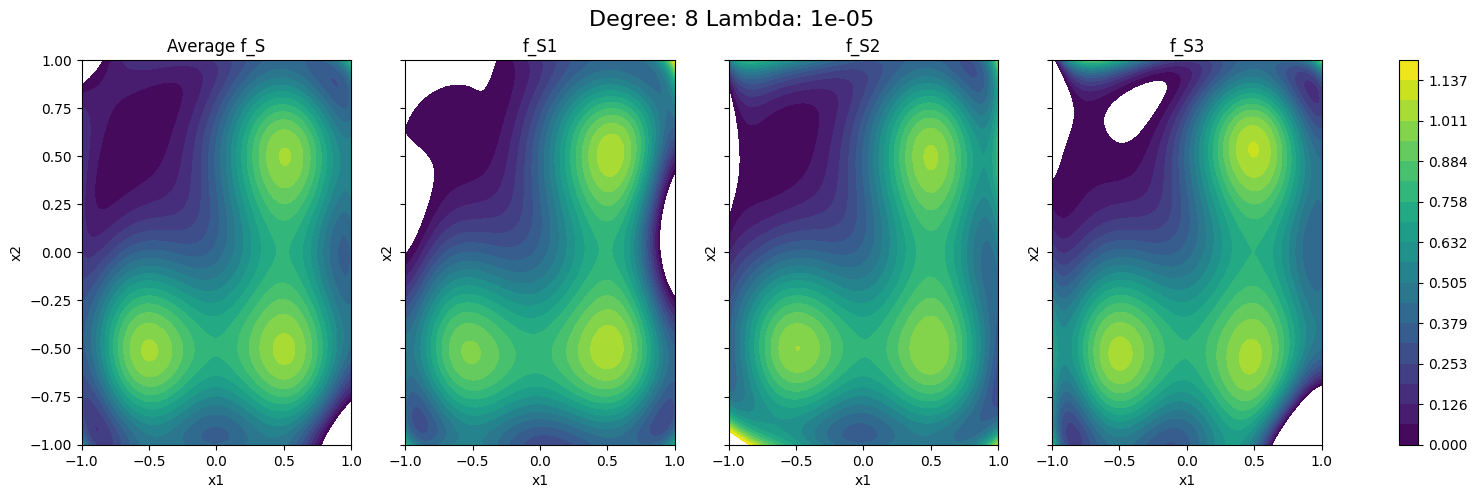

Degree = 8 lambda = 0.001
Bias = 0.07168372609541829
Variance = 0.021621294597085033
MSE = 0.026759851184007987


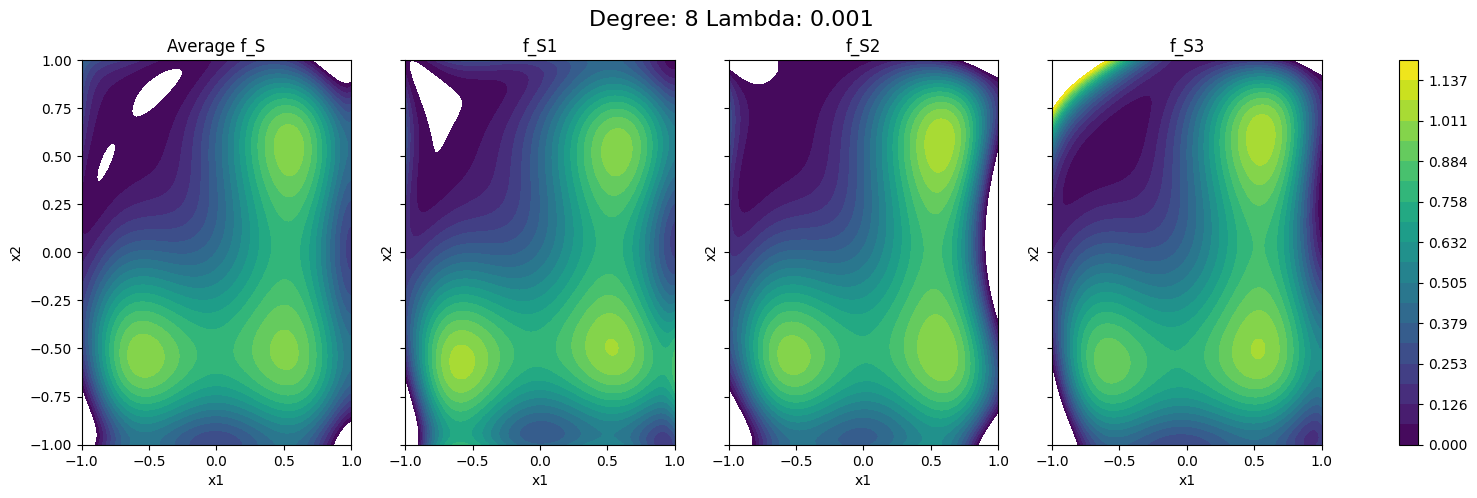

Degree = 8 lambda = 0.1
Bias = 0.09903008472317934
Variance = 0.007329477587957749
MSE = 0.017136435268237826


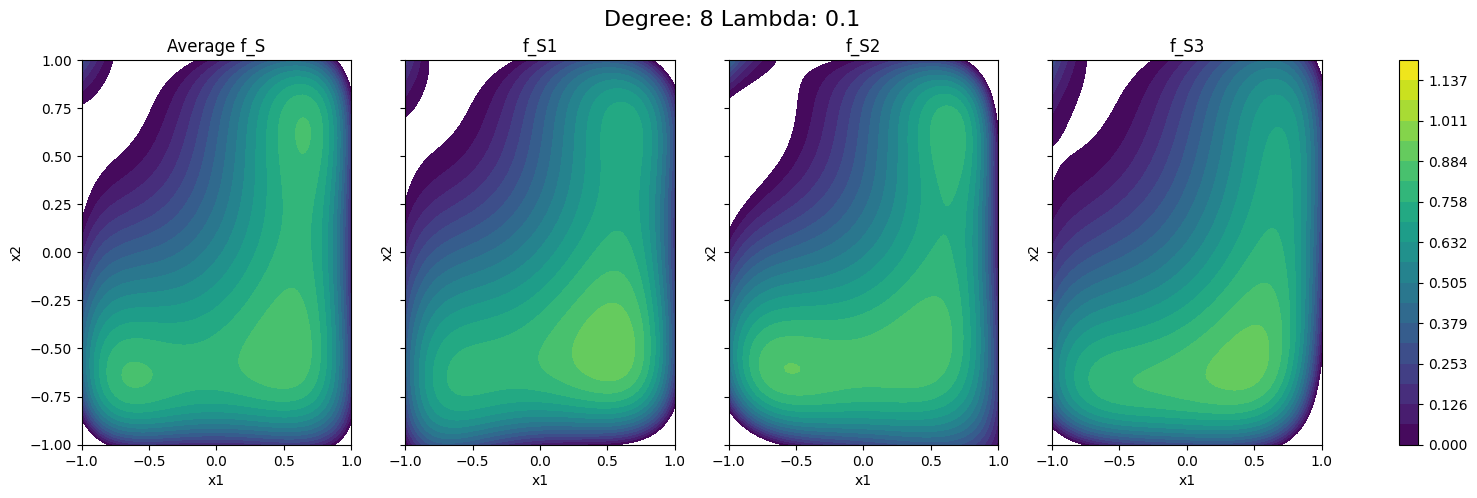

Degree = 8 lambda = 10.0
Bias = 0.2368805073952653
Variance = 0.0025915968645543624
MSE = 0.0587039716483927


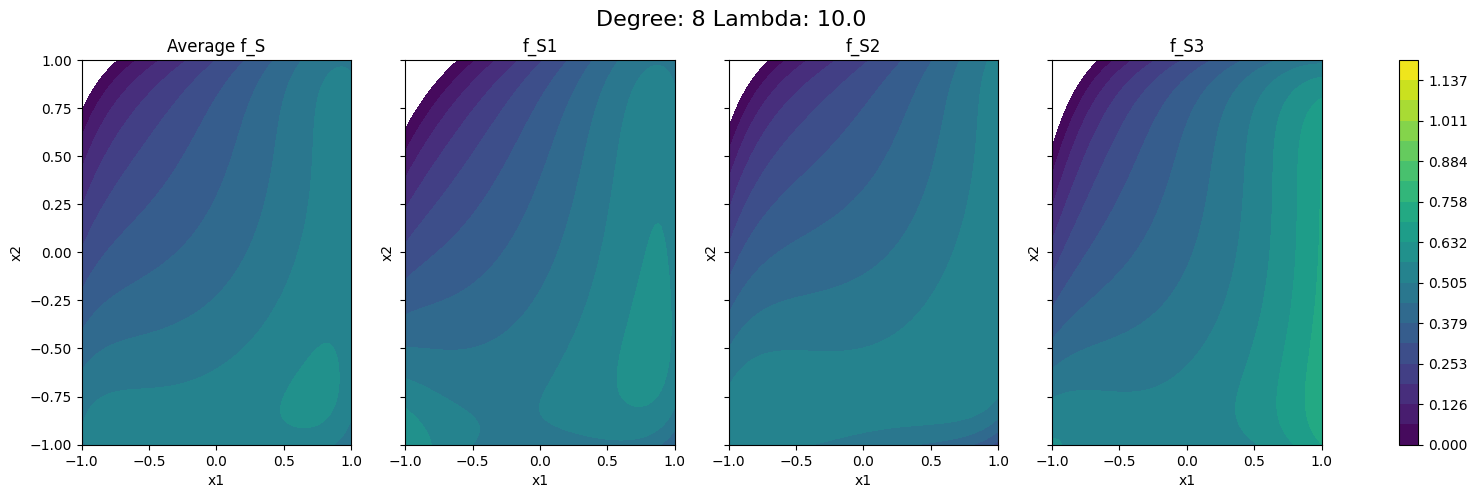

Degree = 8 lambda = 1000.0
Bias = 0.5494096021096728
Variance = 1.4383247431108808e-05
MSE = 0.3018652941377401


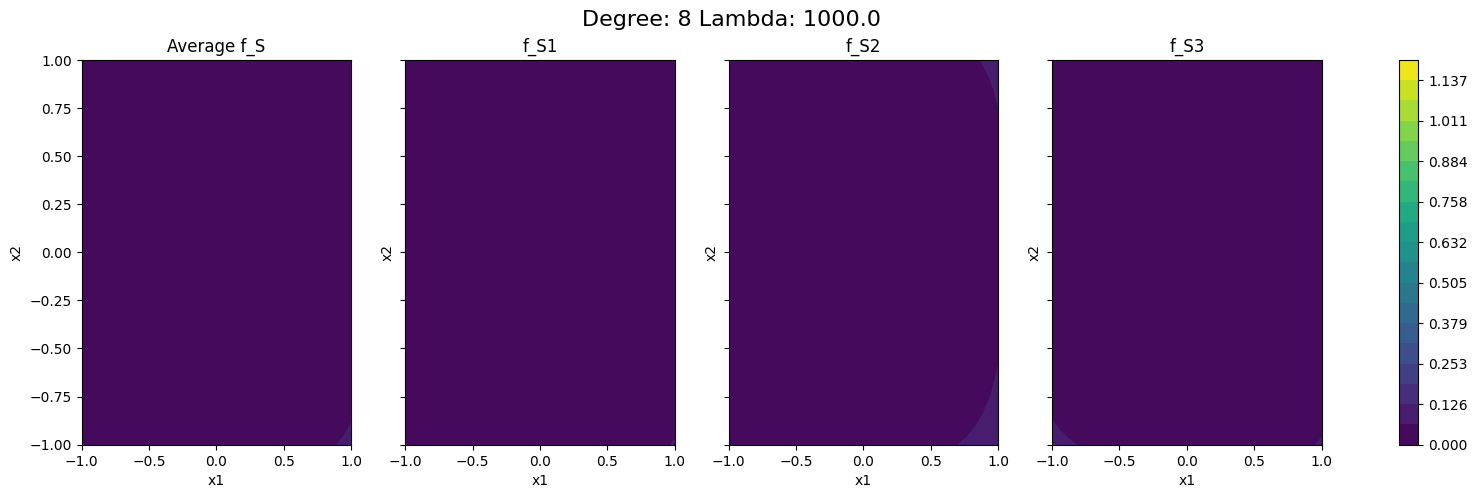

Degree = 16 lambda = 1e-07
Bias = 0.11831935168712122
Variance = 0.35288744031490427
MSE = 0.36688690929856493


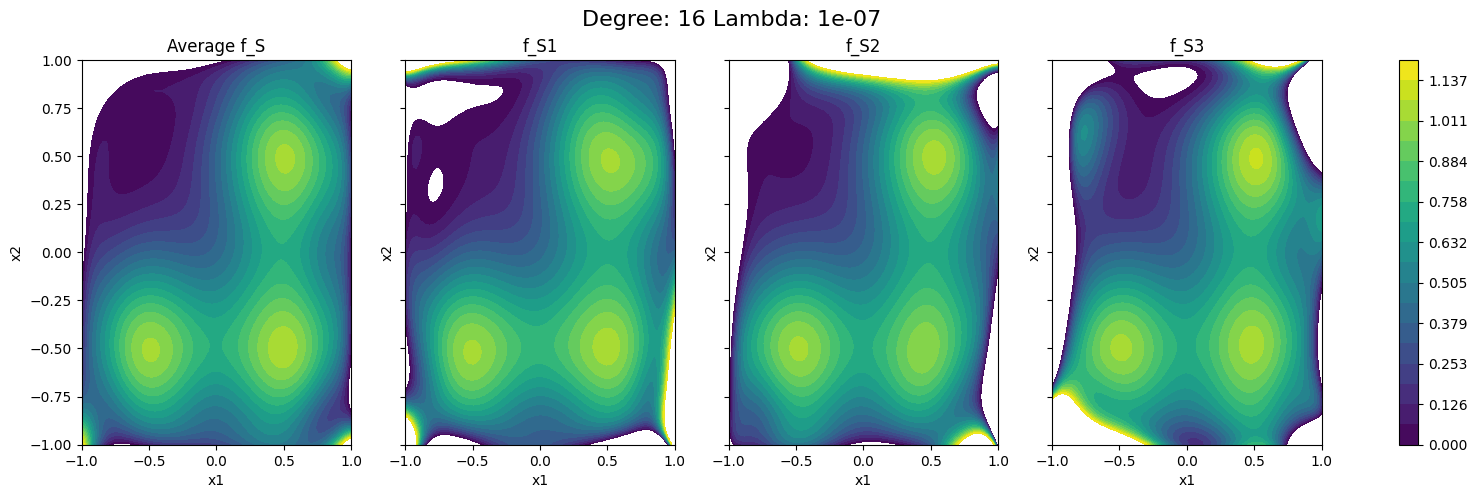

Degree = 16 lambda = 1e-05
Bias = 0.11364148792918599
Variance = 0.20289411113828648
MSE = 0.21580849891704582


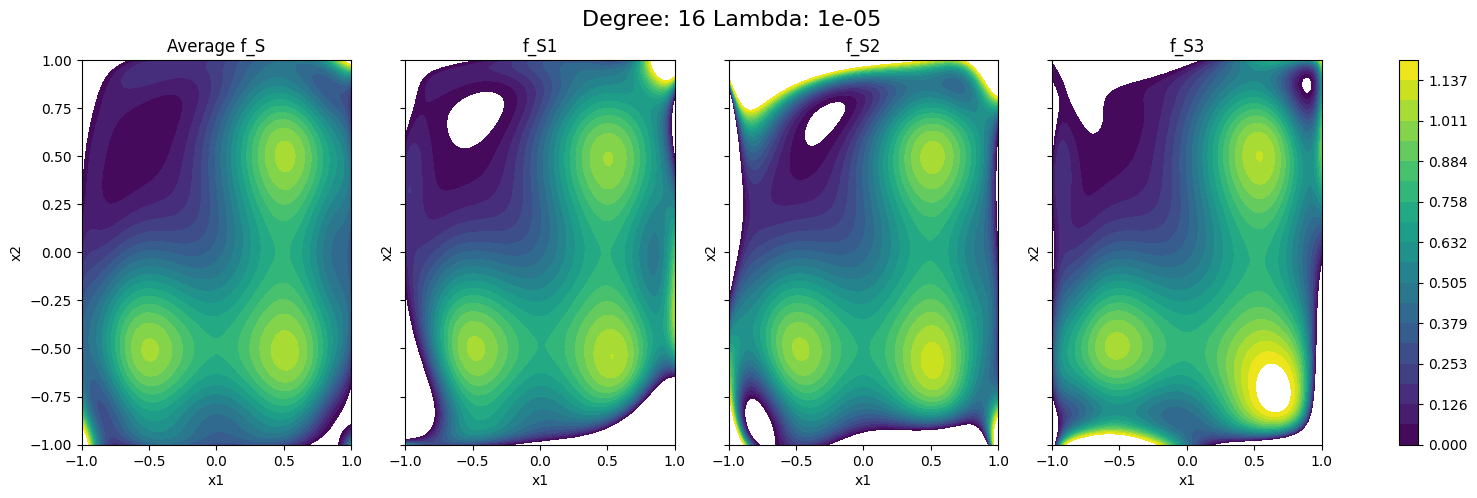

Degree = 16 lambda = 0.001
Bias = 0.08493063238144728
Variance = 0.06719506948828709
MSE = 0.07440828180499963


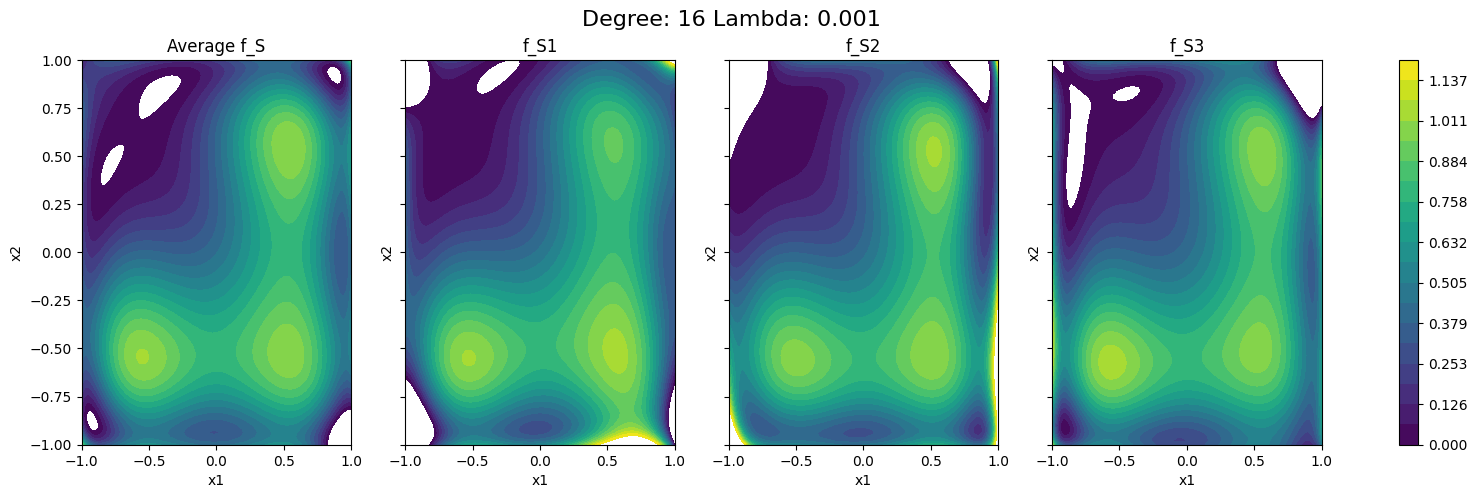

Degree = 16 lambda = 0.1
Bias = 0.10837714737983804
Variance = 0.014336168748482874
MSE = 0.02608177482267401


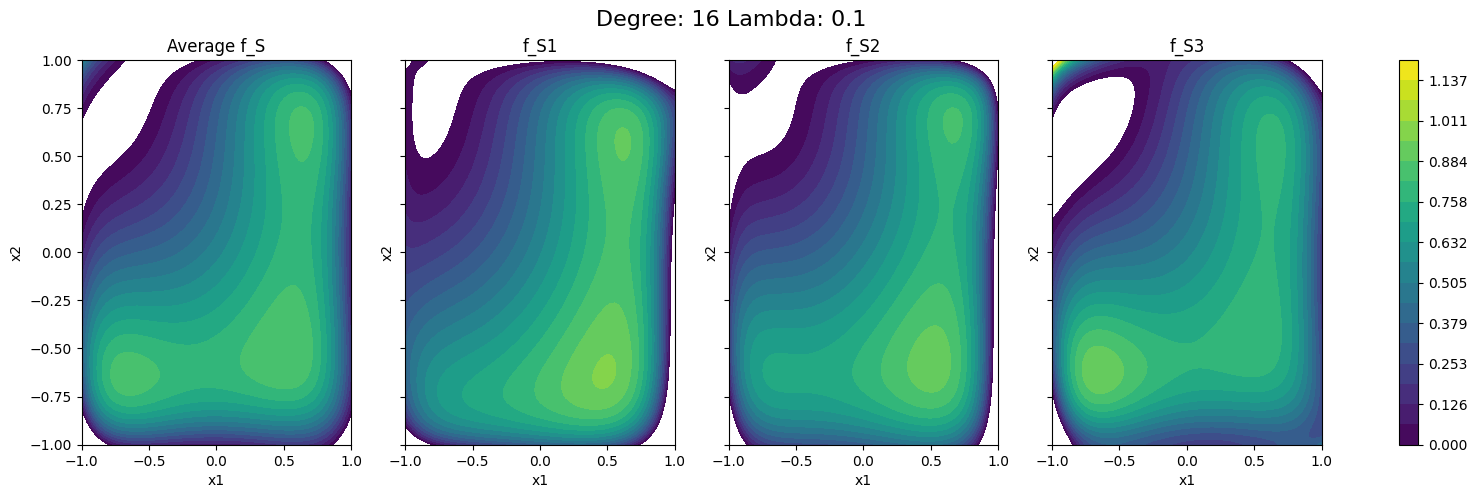

Degree = 16 lambda = 10.0
Bias = 0.22762790846052677
Variance = 0.002487405912794277
MSE = 0.054301870622908234


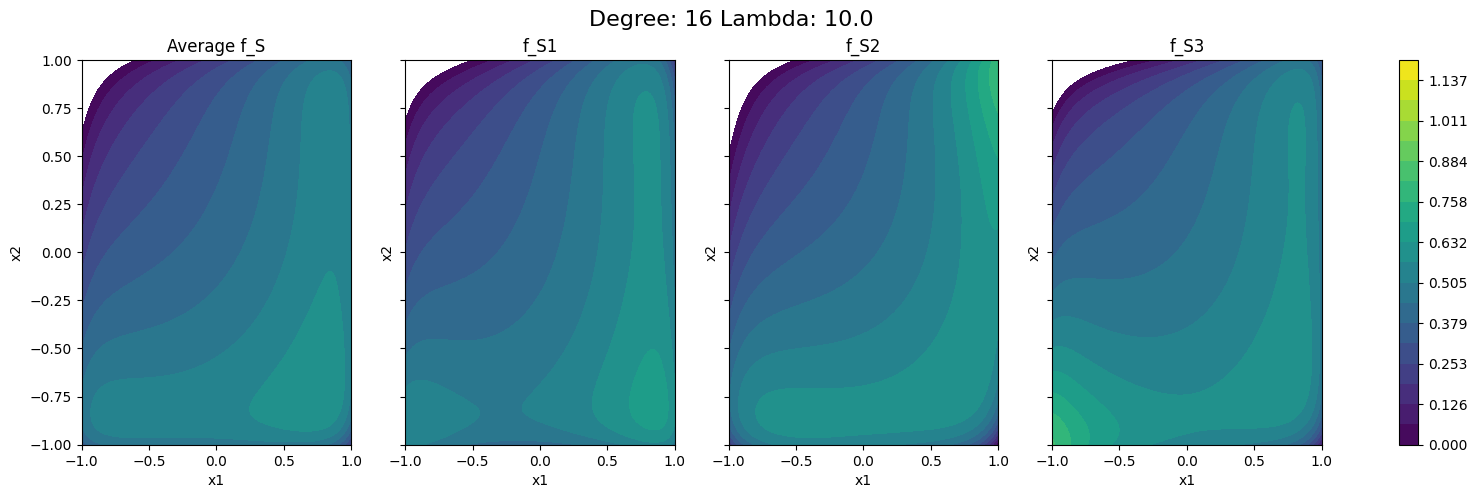

Degree = 16 lambda = 1000.0
Bias = 0.5488232473856128
Variance = 1.505354891336828e-05
MSE = 0.30122201041980295


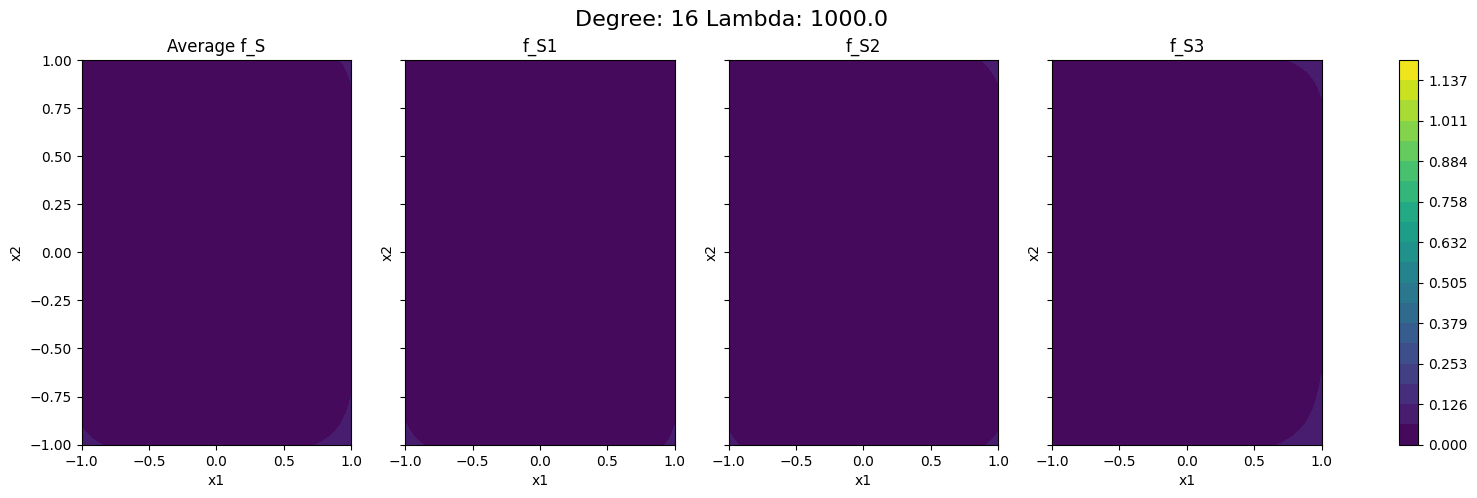

In [8]:
# Cell type : CodeWrite

"""
NOTE: THIS TAKES 12-15 MINUTES TO RUN
"""
def phi_2(x, degree):
    # x is a 2D array of shape (N, 2)
    # need heterogeneous polynomial features of degree 'degree'
    x_new = []
    for i in range(x.shape[0]):
        x_temp = []
        for j in range(degree+1):
            for k in range(degree+1):
                if j+k <= degree:
                    x_temp.append(x[i, 0]**j * x[i, 1]**k)
        x_new.append(x_temp)   
    return x_new

def generateYValue(x):
    """Generates the Y value for the given X value"""
    a = [0.5, 0.5]
    b = [-0.5, -0.5]
    c = [0.5, -0.5]
    term1 = np.exp(-4 * np.dot(x-a, x-a))
    term2 = np.exp(-4 * np.dot(x-b, x-b))
    term3 = np.exp(-4 * np.dot(x-c, x-c))
    return term1 + term2 + term3

def generateYValues(X):
    """Generates the Y values for the given X values"""
    Y = []
    for i in range(X.shape[0]):
        Y.append(generateYValue(X[i]))
    return np.array(Y)

def calculate_bias_variance(w_matrix, degree):
    """
    This function calculates the bias and variance for a given set of weights

    Parameters:
    w_matrix : numpy array of shape (N, d') - The polynomial regression weights for N runs of the algorithm
    degree : int - The degree of the polynomial
    
    Returns:
    bias : float - The bias of the model
    variance : float - The variance of the model
    """
    # Calculating the mean of the w_matrix entries
    w_mean = np.mean(w_matrix, axis=0)
    # Creating a plotting grid
    X, Y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
    X_matrix = np.zeros((X.shape[0]*X.shape[1], 2))
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            X_matrix[i*X.shape[0]+j, 0] = X[i, j]
            X_matrix[i*X.shape[0]+j, 1] = Y[i, j]
    # Initializing the bias and variance
    bias = 0
    variance = 0
    # Predicting the values with mean w
    Z_mean = polynomial_regression_ridge_pred(X_matrix, w_mean, degree)
    # Calculating the bias
    for i in range(X_matrix.shape[0]):
        bias += (Z_mean[i] - generateYValue(X_matrix[i]))**2
    # Calculating the variance
    for i in range(w_matrix.shape[0]):
        Z = polynomial_regression_ridge_pred(X_matrix, w_matrix[i], degree)
        for j in range(X_matrix.shape[0]):
            variance += (Z[j] - Z_mean[j])**2
    # Returning the bias and variance
    bias /= X_matrix.shape[0]
    bias = np.sqrt(bias)
    variance /= X_matrix.shape[0]
    variance /= w_matrix.shape[0]
    return bias, variance

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    # Creating the phi matrix
    X_test_poly = phi_2(X_test, degree)
    X_test_poly = np.array(X_test_poly)
    # Calculating the Y_test_pred
    Y_test_pred = np.matmul(X_test_poly, wt_vector)
    return Y_test_pred

    
def visualise_polynomial_2d(ax, wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    # Creating the plotting grid
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    # Get Z using other functions
    X_matrix = np.zeros((X.shape[0]*X.shape[1], 2))
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            X_matrix[i*X.shape[0]+j, 0] = X[i, j]
            X_matrix[i*X.shape[0]+j, 1] = Y[i, j]
    # Predicting the values
    Z = polynomial_regression_ridge_pred(X_matrix, wt_vector, degree)
    Z = Z.reshape(X.shape[0], X.shape[1])
    # Plotting the contour
    contour = ax.contourf(X,Y,Z, levels=np.linspace(0, 1.2, 20))
    ax.set_title(title)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    return contour
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.
    
    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    # Creating the phi matrix
    X_train_poly = phi_2(X_train, degree)
    X_train_poly = np.array(X_train_poly)
    X_train_poly_transpose = np.transpose(X_train_poly)
    # Calculating the w vector using (phi^T * phi + lambda * I)^-1 * phi^T * Y
    a = np.matmul(X_train_poly_transpose, X_train_poly)
    a += reg_param * np.eye(a.shape[0])
    b = np.matmul(X_train_poly_transpose, Y_train)
    w = np.matmul(np.linalg.inv(a), b)
    return w

def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. 
    """
    # phi_size is the size of the feature vector (n+d)C(d)
    phi_size = (degree+2)*(degree+1)/2
    w_matrix = []
    # Creating the w_matrix with 100 different w vectors with each sample having num_training_samples samples
    for i in range(100):
        X_train = np.random.uniform(-1, 1, (num_training_samples, 2))
        Y_train = generateYValues(X_train)
        w = polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)
        Y_train_pred = polynomial_regression_ridge_pred(X_train, w, degree)
        w_matrix.append(w)
    w_matrix = np.array(w_matrix)
    # Calculating the bias and variance
    w_mean = np.mean(w_matrix, axis=0)
    bias, variance = calculate_bias_variance(w_matrix, degree)
    # Plotting the contour plots
    fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
    fig.suptitle("Degree: " + str(degree) + " Lambda: " + str(reg_param), x=0.45, fontsize=16)
    contour = visualise_polynomial_2d(ax[0], w_mean, degree, "Average f_S")
    for i in range(3):
        visualise_polynomial_2d(ax[i+1], w_matrix[i], degree, "f_S" + str(i+1))
    # Adding the colorbar
    plt.colorbar(contour, ax=ax.ravel().tolist())
    # Calculating the mean squared error
    mse = bias**2 + variance
    return bias, variance, mse

# Calculating the bias and variance
bias_table = []
bias_table.append([" ", 1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3])
variance_table = []
variance_table.append([" ", 1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3])

for degree in [1,2,4,8,16]:
    # Creating the bias and variance table
    bias_row = []
    bias_row.append(degree)
    variance_row = []
    variance_row.append(degree)
    for reg_param in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        bias_row.append(b)
        variance_row.append(v)
        
        print('================================')
        print('Degree = '+str(degree)+' lambda = '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))
        plt.show()
    
    bias_table.append(bias_row)
    variance_table.append(variance_row)

In [9]:
# Cell type: convenience

def markdown_table_print(table):
    for row in table:
        print('|', end='')
        for col in row:
            print(str(col)+'|', end='')
        print()

print('Bias Table')
markdown_table_print(bias_table)
print('Variance Table')
markdown_table_print(variance_table)

Bias Table
| |1e-07|1e-05|0.001|0.1|10.0|1000.0|
|1|0.23554719754855397|0.23478255327048977|0.23535254034795094|0.23494920271991818|0.25558174528723226|0.5544576130612696|
|2|0.18668868844562533|0.18670286650268697|0.18685050866687467|0.186113601306755|0.2478739872179507|0.5509011510640607|
|4|0.09544134259251695|0.09246313573709376|0.0920083980884881|0.09496571849162583|0.24556936679841287|0.5500422756789987|
|8|0.08081614703578278|0.06346306269853712|0.07168372609541829|0.09903008472317934|0.2368805073952653|0.5494096021096728|
|16|0.11831935168712122|0.11364148792918599|0.08493063238144728|0.10837714737983804|0.22762790846052677|0.5488232473856128|
Variance Table
| |1e-07|1e-05|0.001|0.1|10.0|1000.0|
|1|0.0038974467577163334|0.004007672085413707|0.003922018269379549|0.0038501036131002864|0.0015623222756768|6.350844920677929e-06|
|2|0.0050562109832233346|0.005724721958626178|0.005991910747492003|0.005014679424080232|0.00174059835900117|7.4347493219548685e-06|
|4|0.010301993272577852|

** Cell type: TextWrite **

# Problem 3
## Polynomial Regression
### Bias Table
| Degree/Reg. Param |1e-07|1e-05|0.001|0.1|10.0|1000.0|
|---|---|---|---|---|---|---|
|**1**|0.23486135551386536|0.23481634726362727|0.23474138519727547|0.23474603340604946|0.25640166291923094|0.5543361096310807|
|**2**|0.18688511096235128|0.18630883373625717|0.18723002395557783|0.18713160326136313|0.24816281152245676|0.5511509959605723|
|**4**|0.091533763599978|0.09168517541969946|0.09194639087637417|0.0946723168777817|0.24489509194329456|0.5499344587728966|
|**8**|0.09125357440828114|0.045736422151295905|0.07717540655387994|0.09944210440069365|0.2371542942743962|0.5491510098353174|
|**16**|0.1769203728842711|0.11489714013440935|0.08430384960793692|0.11487374510919404|0.22800067028934937|0.5486168939337024|
### Variance Table
|Degree/Reg. Param |1e-07|1e-05|0.001|0.1|10.0|1000.0|
|---|---|---|---|---|---|---|
|**1**|0.003205681303174443|0.0035723521903253774|0.0031552442220290616|0.0032026710248710373|0.0015462320277553022|6.497281128150696e-06|
|**2**|0.0063960894792592544|0.004947046235357186|0.005702929418202972|0.005993021862430925|0.001845371715997346|7.776177422828424e-06|
|**4**|0.007601215924916817|0.008994427342979708|0.00994443596335256|0.0035558551511334973|0.002151104232879181|1.1289682917217659e-05|
|**8**|0.24323798048089368|0.04566226659186067|0.01926752769961452|0.006730250188859365|0.0023735753386583723|1.4463804376007928e-05|
|**16**|0.38705909665392485|0.2049060874930859|0.06134008420166821|0.012226641153345912|0.0026697439168494163|1.5990040813582173e-05|

NOTE: The bias and variance values are from a particular run and it wont be possible to regenerate the same values due to randomness of the sample. However, the values are close to the ones in the table above.

### Conclusion
<h5>1. For a given degree, bias increases and variance decreases with increasing regularization parameter.<br>
2. For a given regularization parameter, bias decreases and variance increases with increasing degree.<br>
3. There is a little exception seen to the second observation in bias for degree 16 in the lower order of regularization parameter.</h5>

** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




Minimum test MSE:  0.15673525917060369 for test size:  50
Best Degree:  2
Best Regularization parameter:  0.1


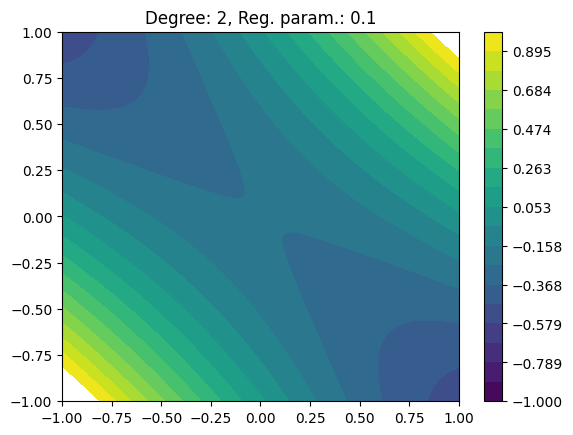

Minimum test MSE:  0.14277575186837815 for test size:  100
Best Degree:  4
Best Regularization parameter:  1e-09


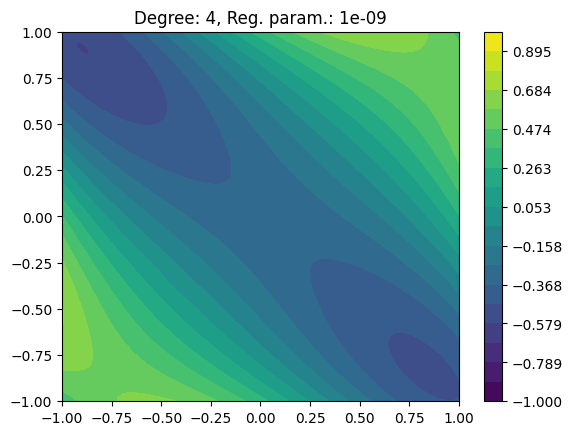

Minimum test MSE:  0.03714921968320016 for test size:  200
Best Degree:  16
Best Regularization parameter:  1e-09


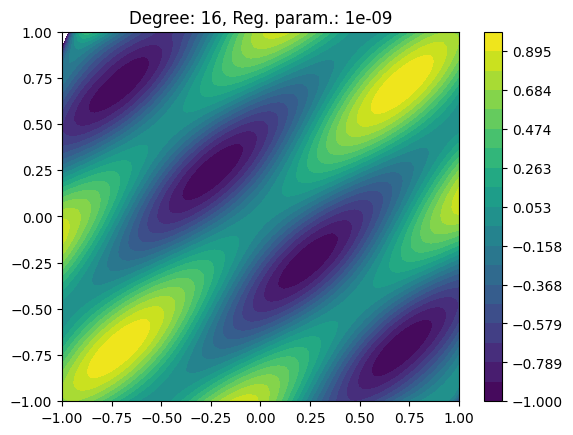

Minimum test MSE:  0.0011977234497653497 for test size:  1000
Best Degree:  16
Best Regularization parameter:  1e-09


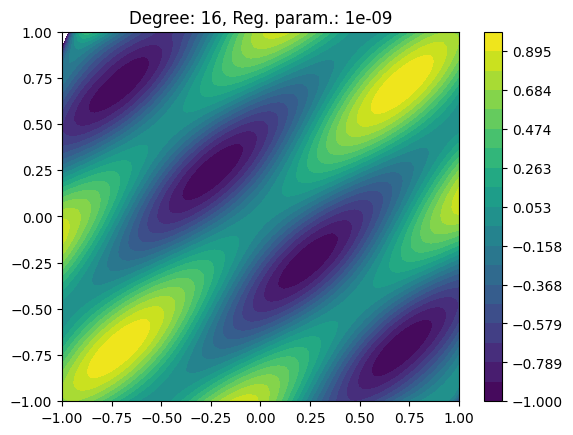

In [10]:
# Cell type : CodeWrite 
"""
NOTE: THIS TAKES 25-40 SECONDS TO RUN
"""
# Loading the data
data = np.load("../../Data/dataset4_1.npz")
X_train = data["arr_0"]
Y_train = data["arr_1"]
X_test = data["arr_2"]
Y_test = data["arr_3"]

# Different test_sizes, degrees and lambda values
test_sizes = [50, 100, 200, 1000]
degrees = [1, 2, 4, 8, 16]
reg_params = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]

def phi_2(x, degree):
    # x is a 2D array of shape (N, 2)
    # need heterogeneous polynomial features of degree 'degree'
    x_new = []
    for i in range(x.shape[0]):
        x_temp = []
        for j in range(degree+1):
            for k in range(degree+1):
                if j+k <= degree:
                    x_temp.append(x[i, 0]**j * x[i, 1]**k)
        x_new.append(x_temp)   
    return x_new

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    # Getting the phi matrix for the test data
    X_test_poly = phi_2(X_test, degree)
    X_test_poly = np.array(X_test_poly)
    # Calculating the predicted values
    Y_test_pred = np.dot(X_test_poly, wt_vector)
    return Y_test_pred

def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.
    
    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    # Getting the phi matrix for the training data
    X_train_poly = phi_2(X_train, degree)
    X_train_poly = np.array(X_train_poly)
    X_train_poly_transpose = np.transpose(X_train_poly)
    # Calculating the w vector
    a = np.matmul(X_train_poly_transpose, X_train_poly)
    a += reg_param * np.eye(a.shape[0])
    b = np.matmul(X_train_poly_transpose, Y_train)
    w = np.matmul(np.linalg.inv(a), b)
    return w

def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    # Creating the meshgrid
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    # Get Z using other functions
    X_matrix = np.zeros((X.shape[0]*X.shape[1], 2))
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            X_matrix[i*X.shape[0]+j, 0] = X[i, j]
            X_matrix[i*X.shape[0]+j, 1] = Y[i, j]
    # Getting the predicted values
    Z = polynomial_regression_ridge_pred(X_matrix, wt_vector, degree)
    Z = Z.reshape(X.shape[0], X.shape[1])
    # Plotting the contour plot
    plt.contourf(X,Y,Z,levels=np.linspace(-1.,1. , 20))
    plt.title(title)
    plt.colorbar()
    plt.show()

# Initializing the training and testing error tables
train_mse_table_full = []
test_mse_table_full = []

for test_size in test_sizes:
    train_mse_table = []
    test_mse_table = []
    train_mse_table.append([" ", 1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1])
    test_mse_table.append([" ", 1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1])

    for degree in degrees:
        train_mse_row = [degree]
        test_mse_row = [degree]

        for reg_param in reg_params:
            # Getting the training and testing data
            X_train_sample = X_train[:test_size]
            Y_train_sample = Y_train[:test_size]
            # Getting the w vector
            w = polynomial_regression_ridge_train(X_train_sample, Y_train_sample, degree, reg_param)
            # Getting the predicted values
            Y_train_pred = polynomial_regression_ridge_pred(X_train_sample, w, degree)
            Y_test_pred = polynomial_regression_ridge_pred(X_test, w, degree)
            # Calculating the MSE
            train_mse = np.dot(Y_train_sample - Y_train_pred, Y_train_sample - Y_train_pred) / test_size
            test_mse = np.dot(Y_test - Y_test_pred, Y_test - Y_test_pred) / Y_test.shape[0]
            # Adding the MSE to the table
            train_mse_row.append(train_mse)
            test_mse_row.append(test_mse)

        # Adding the row to the table
        train_mse_table.append(train_mse_row)
        test_mse_table.append(test_mse_row)

    # Convert the table to a np array
    train_mse_table = np.array(train_mse_table, dtype=object)
    test_mse_table = np.array(test_mse_table, dtype=object)

    # Finding the best parameters using the test MSE
    test_mse_only_values = test_mse_table[1:, 1:].astype(np.float64)
    min_test_mse = np.min(test_mse_only_values)
    min_test_mse_index = np.argmin(test_mse_only_values)
    min_test_mse_degree = test_mse_table[1:, 0][min_test_mse_index // 6]
    min_test_mse_reg_param = test_mse_table[0, 1:][min_test_mse_index % 6]
    # Printing the best parameters
    print("Minimum test MSE: ", min_test_mse , "for test size: ", test_size)
    print("Best Degree: ", min_test_mse_degree)
    print("Best Regularization parameter: ", min_test_mse_reg_param)
    # Getting the w vector for the best parameters
    w = polynomial_regression_ridge_train(X_train, Y_train, min_test_mse_degree, min_test_mse_reg_param)
    # Visualising the polynomial
    visualise_polynomial_2d(w, min_test_mse_degree, "Degree: " + str(min_test_mse_degree) + ", Reg. param.: " + str(min_test_mse_reg_param))

    train_mse_table_full.append(train_mse_table)
    test_mse_table_full.append(test_mse_table)

** Cell type : TextWrite **

### Test size:  50
#### Train MSE

| |1e-09|1e-07|1e-05|0.001|0.1|10.0|
|---|---|---|---|---|---|---|
|1|0.2503831240657272|0.2503831240657272|0.2503831240657403|0.2503831241962755|0.2503844155180829|0.25589782969635694|
|2|0.13411159812134157|0.13411159812134166|0.13411159812242815|0.13411160897987467|0.13421305918294477|0.1974826992879742|
|4|0.1020183145266075|0.1020183145266193|0.10201831464463726|0.10201945605437712|0.10410664921246371|0.18063792530763295|
|8|0.00013273273940366326|0.000199157117454203|0.010765781159334997|0.04172134455598485|0.08199099254870258|0.1631997018256798|
|16|1.9519860074021525e-08|9.367010831950332e-06|0.0013176931515055809|0.03111309253643328|0.07002070549491711|0.15001286027072638|

#### Test MSE

| |1e-09|1e-07|1e-05|0.001|0.1|10.0|
|---|---|---|---|---|---|---|
|1|0.3012668176334997|0.30126681720565973|0.30126677442170297|0.3012624963818577|0.3008382242491881|0.27835069389037026|
|2|0.15789998862477167|0.15789998726922783|0.15789985171700213|0.15788631804663877|0.15673525917060369|0.2082236412074107|
|4|0.15733396608389036|0.15733395601599098|0.15733295030576852|0.15724278102171765|0.16182638818918757|0.19656859546515695|
|8|237.69005788285926|172.50186179881635|18.594253932152967|0.990250752861888|0.16515576169863988|0.1939185875290034|
|16|250.62481438931283|232.02413979173627|66.69768388255642|2.337308326001019|0.20396145737466312|0.19605732165075784|

### Test size:  100
#### Train MSE

| |1e-09|1e-07|1e-05|0.001|0.1|10.0|
|---|---|---|---|---|---|---|
|1|0.25809101333931356|0.2580910133393136|0.2580910133393146|0.25809101334983686|0.25809111800124085|0.25873987508331553|
|2|0.13095062750764616|0.1309506275076462|0.13095062750780453|0.13095062909102842|0.13096608770879403|0.16496776073260552|
|4|0.11302663784179165|0.11302663784179279|0.11302663785305081|0.11302674963672633|0.11365141158303718|0.15237348873650716|
|8|0.041587926415535055|0.04158793751658117|0.04168003942658047|0.05800846639795149|0.09290160568698448|0.1448856959236295|
|16|7.734931004531922e-06|0.0004839670121622039|0.007544023921188554|0.04172918471039675|0.08369694254931302|0.1395438378020544|

#### Test MSE
| |1e-09|1e-07|1e-05|0.001|0.1|10.0|
|---|---|---|---|---|---|---|
|1|0.27314863780495213|0.27314863773972947|0.27314863121747635|0.27314797902036564|0.2730830403049822|0.26862153976765135|
|2|0.1532099311828065|0.15320993087074364|0.153209899664675|0.1532067811876339|0.1529157622358392|0.17570947703823853|
|4|0.14277575186837815|0.14277575501902773|0.14277607009019874|0.14280763851944245|0.14602043222215288|0.16898019238628956|
|8|0.7129163506879391|0.7113196275126835|0.5807591356289198|0.2036382630179193|0.16262757721799362|0.1711684367937082|
|16|54.0784532599565|11.770419028972551|23.4165888446163|0.4178485084020593|0.18835914466912654|0.1741599689085641|

### Test size:  200
#### Train MSE
| |1e-09|1e-07|1e-05|0.001|0.1|10.0|
|---|---|---|---|---|---|---|
|1|0.24653507447805256|0.24653507447805262|0.2465350744780527|0.2465350744794021|0.24653508793957893|0.24664115434052244|
|2|0.13366532560035838|0.13366532560035835|0.1336653256003921|0.1336653259375662|0.13366866006096545|0.1475490375987396|
|4|0.11333815608726722|0.11333815608726752|0.11333815609035064|0.1133381868560195|0.11358989298188123|0.14444440429596622|
|8|0.06173732230563942|0.06173732238529093|0.061738100909699375|0.06394973229166567|0.09568723069707864|0.14119279224291706|
|16|2.881713907303289e-05|0.0010854317427236287|0.01132556434053455|0.044463267503373996|0.0834995667179934|0.13376259890526826|

#### Test MSE
| |1e-09|1e-07|1e-05|0.001|0.1|10.0|
|---|---|---|---|---|---|---|
|1|0.2676630503284213|0.2676630503112202|0.267663048591106|0.2676628765832213|0.26764571096108203|0.2662254689671443|
|2|0.1457806507687193|0.14578065073911126|0.14578064777834812|0.14578035207627696|0.14575448305638755|0.1586822288842049|
|4|0.13117096921340626|0.131170968533752|0.13117090057246053|0.13116414573830348|0.13083053450167634|0.15708511546569276|
|8|0.1373629946654539|0.1373591785285899|0.13698204933154226|0.11818259300504237|0.11396536050910272|0.15645117748199025|
|16|0.03714921968320016|0.08371021377584864|0.17080665777190993|0.08690369897730627|0.11121403432996602|0.15224401261127446|

### Test size:  1000
#### Train MSE
| |1e-09|1e-07|1e-05|0.001|0.1|10.0|
|---|---|---|---|---|---|---|
|1|0.24072821851812304|0.24072821851812304|0.24072821851812296|0.24072821851812826|0.24072821857035245|0.24072871841517665|
|2|0.13882410254246713|0.1388241025424672|0.13882410254246824|0.1388241025534238|0.13882421187545027|0.13971802344395542|
|4|0.12501724217128068|0.1250172421712807|0.12501724217136287|0.12501724299300634|0.12502511583632805|0.13417202903703979|
|8|0.07674285354368446|0.07674285354504165|0.07674286707498448|0.0768462164142532|0.09483803187328167|0.1284382279185247|
|16|2.5485857680268574e-05|0.0004451269131197686|0.006533490626429763|0.03841533988832531|0.08499257629516178|0.12168732408409078|

#### Test MSE
| |1e-09|1e-07|1e-05|0.001|0.1|10.0|
|---|---|---|---|---|---|---|
|1|0.2625346503067699|0.2625346503067177|0.26253465030149337|0.2625346497790766|0.26253459763327336|0.26253030415658646|
|2|0.1424293186375528|0.14242931865008|0.14242931990280278|0.14242944518520462|0.14244207449857782|0.14451885114122895|
|4|0.12707962836551748|0.12707962852222512|0.12707964419304257|0.12708121171337544|0.12724209494603952|0.14093658935220116|
|8|0.08481273587163012|0.08481261182161862|0.08480025143215128|0.0839132354599029|0.09782269201133917|0.13498892442359717|
|16|0.0011977234497653497|0.0014900660068363101|0.010957186971102147|0.049658125957792586|0.09073740480490518|0.12782089604965322|

### Observations

1. The test MSE is always higher than the train MSE. This is expected, since the model is trained on the train set and tested on the test set. The test MSE is a better measure of the model's performance.
2. The higher degree polynomials overfit the train data when the regularization parameter is small and the test size is small. Thus, the test MSE is high. 
3. But when the training set gets more represenative of the actual data, the model is able to generalize better and the test MSE is lower. So, the actual data must be from a higher degree function either a polynomial or a trigonometric function as the plot shows some kind of periodicity.

** Cell type : TextRead **

# Problem 5 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.

(You will have to analyse the posterior expression W|X,Y discussed in class, and figure out the posterior form for W.)










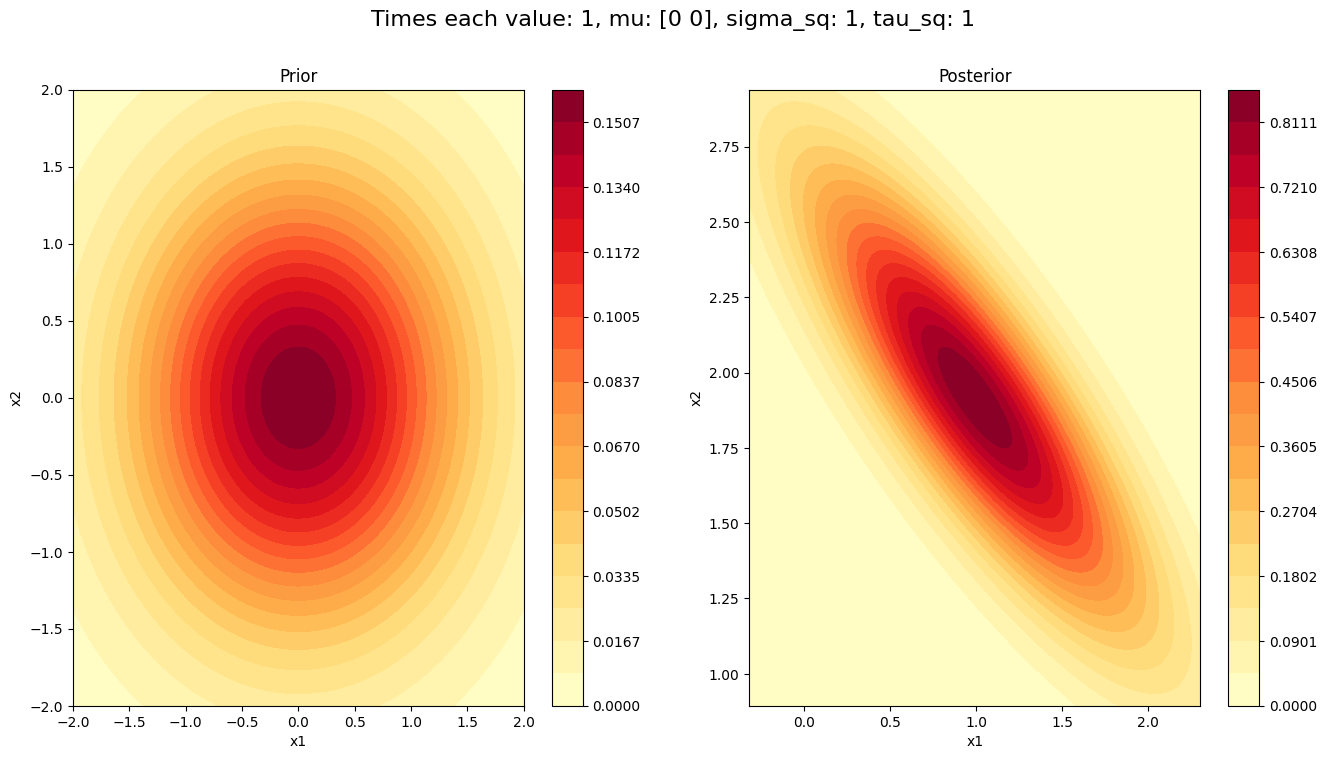

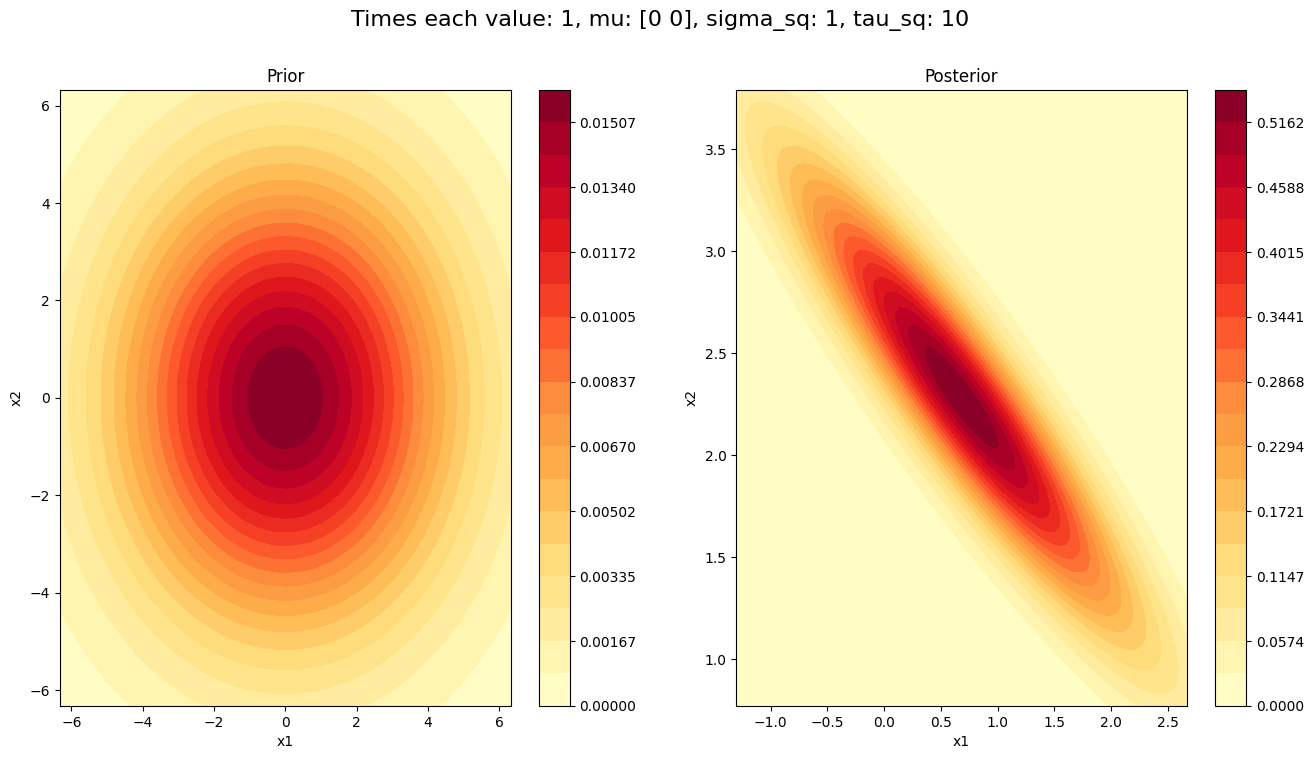

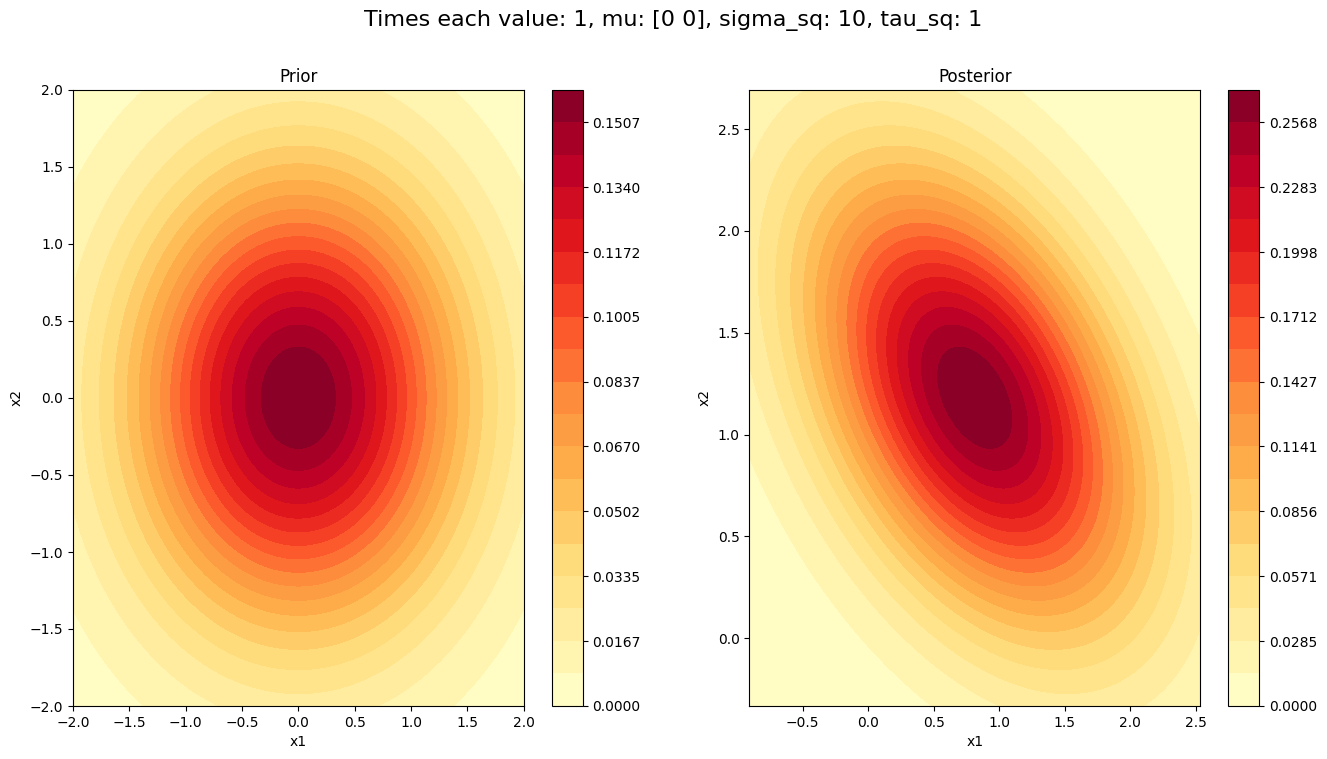

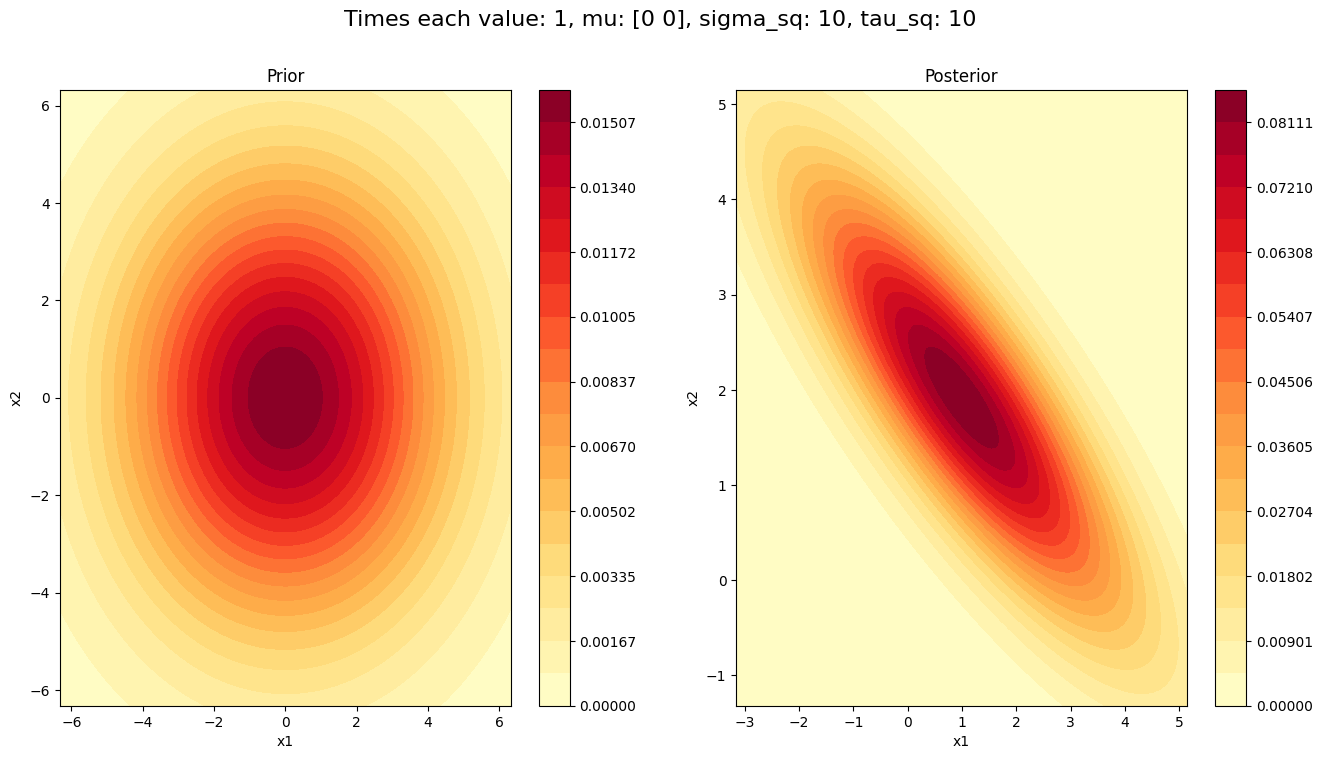

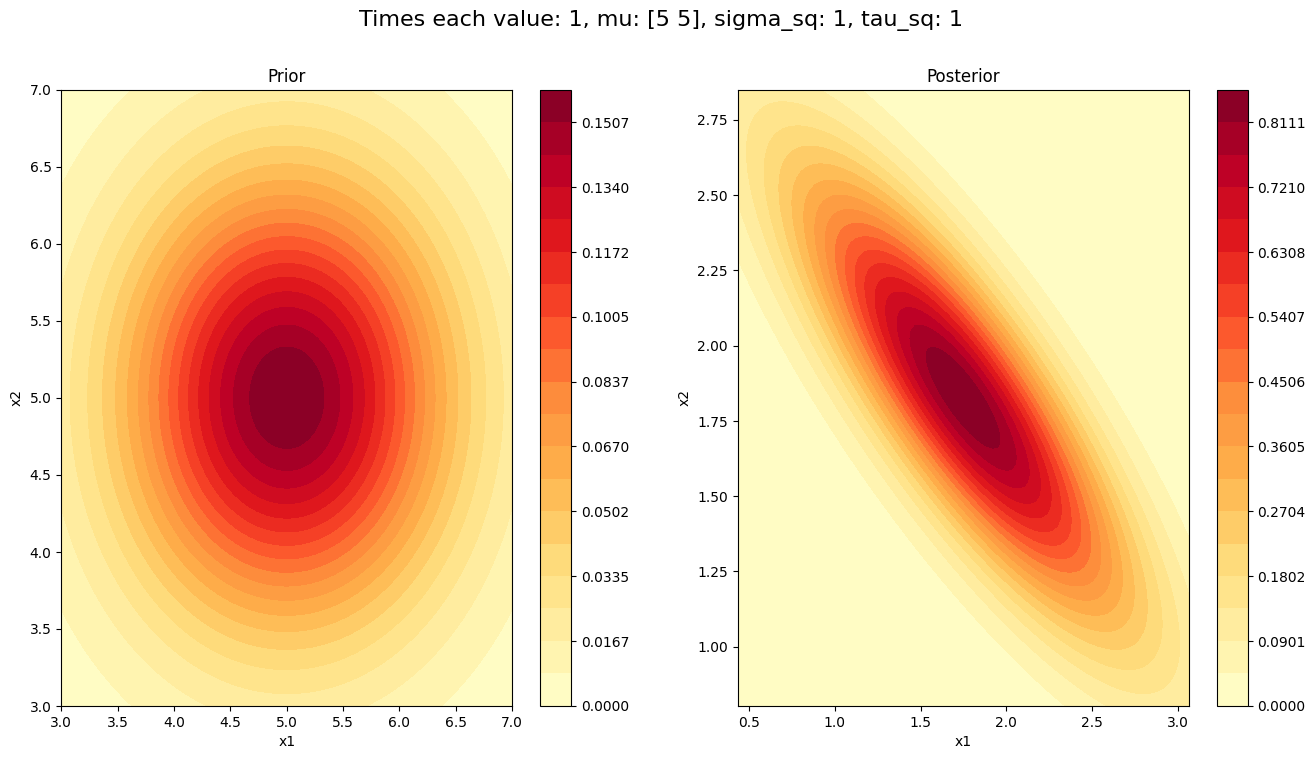

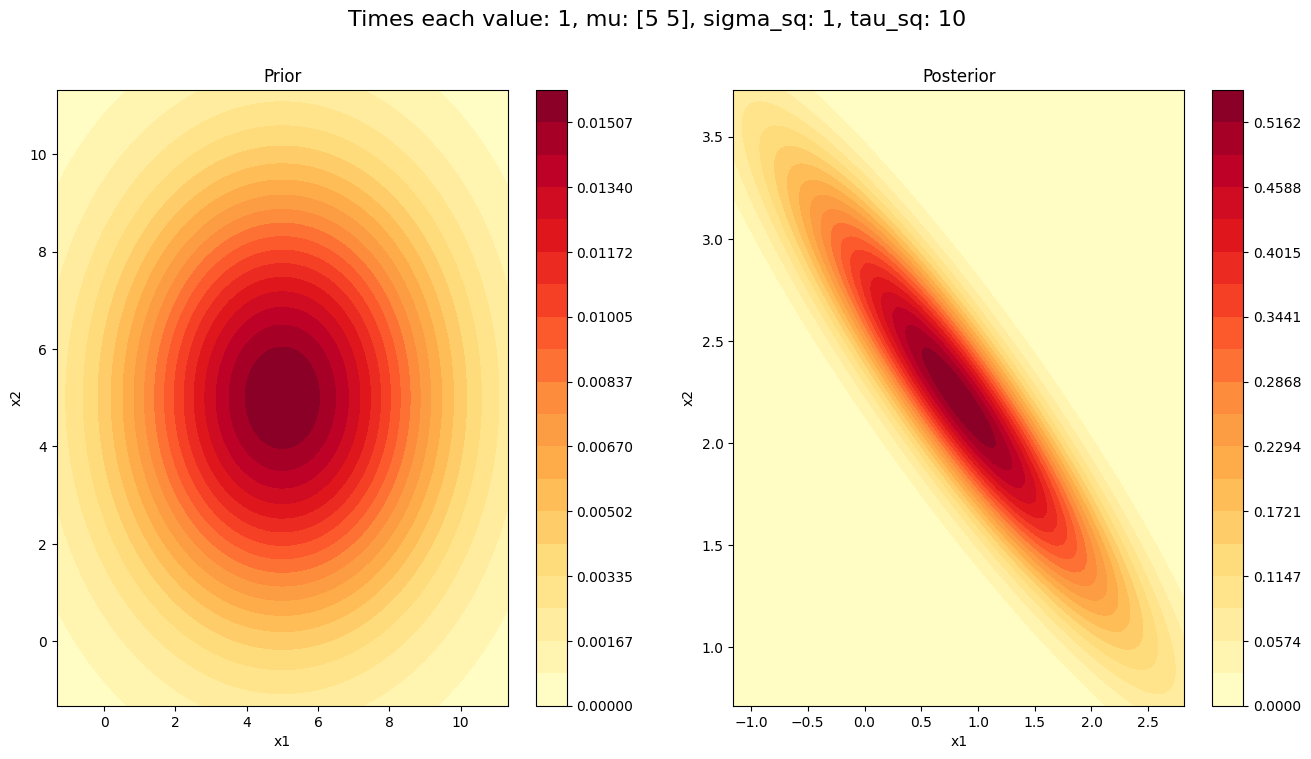

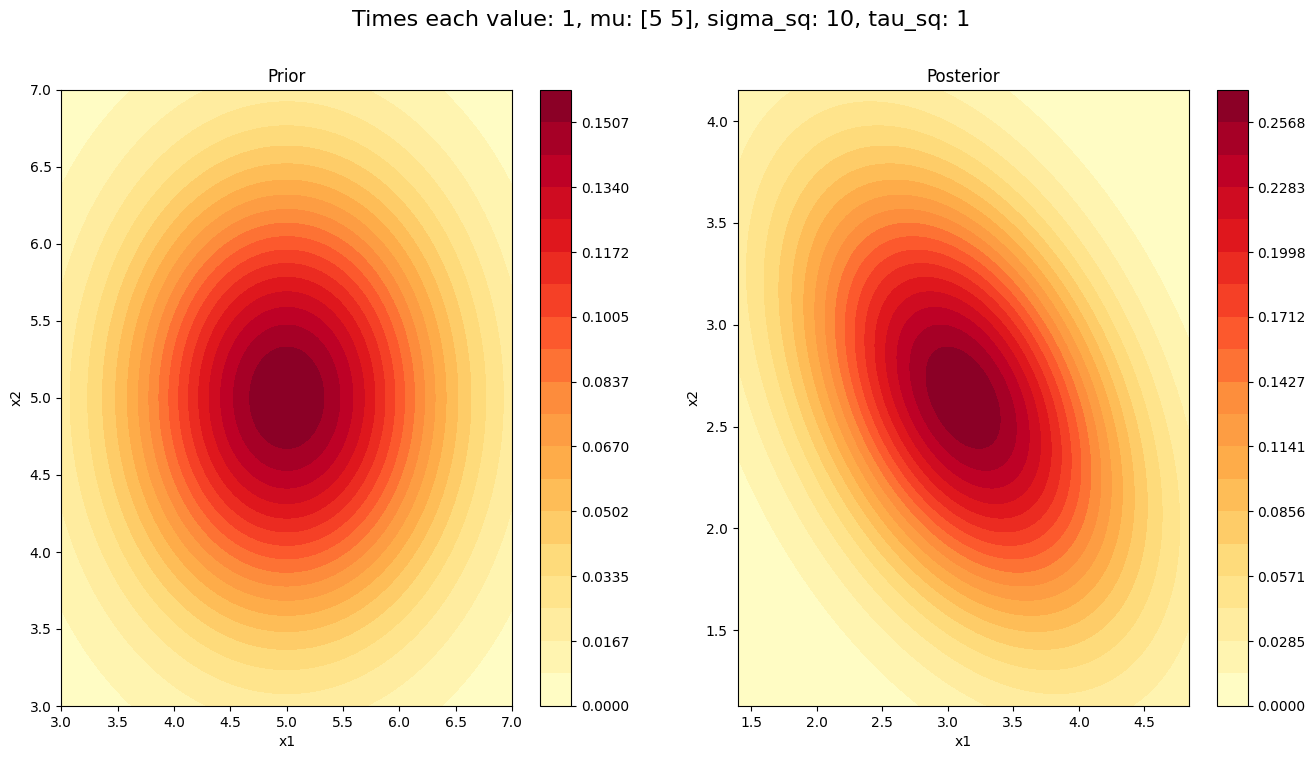

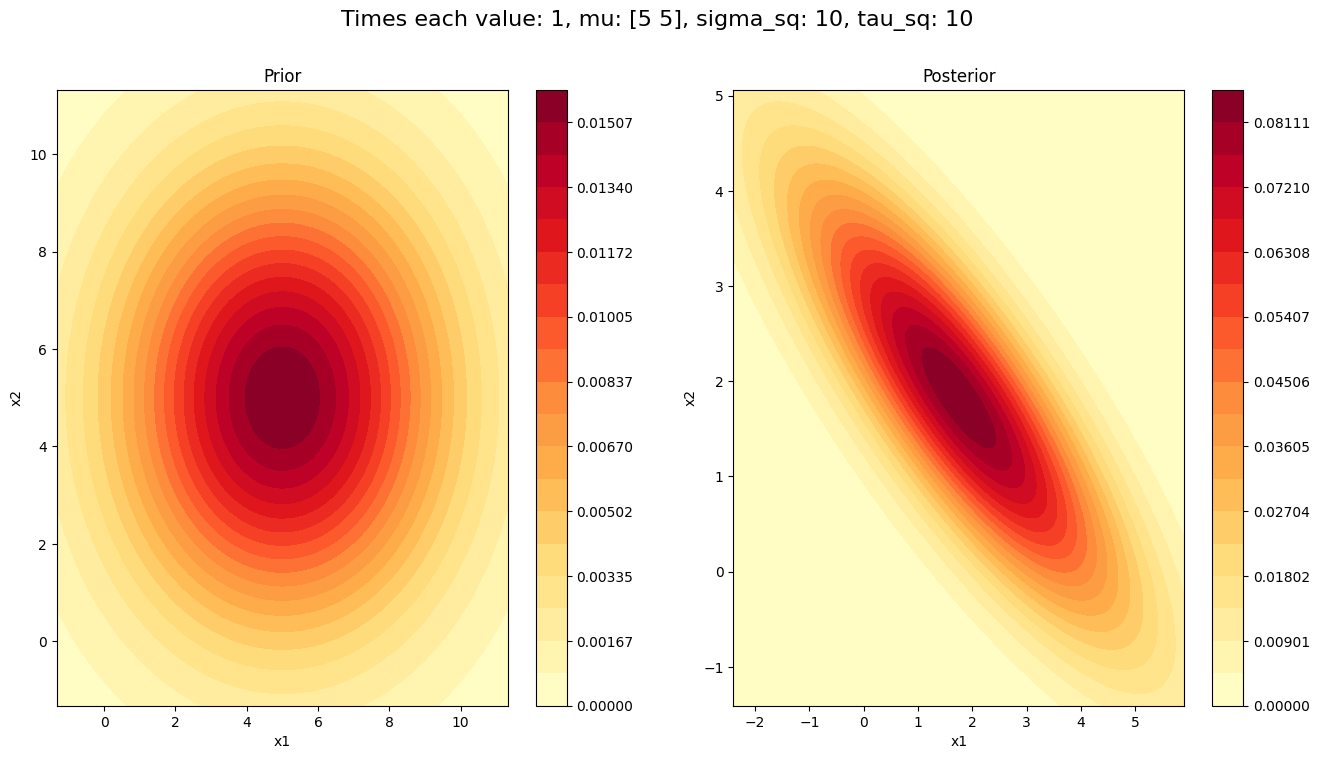

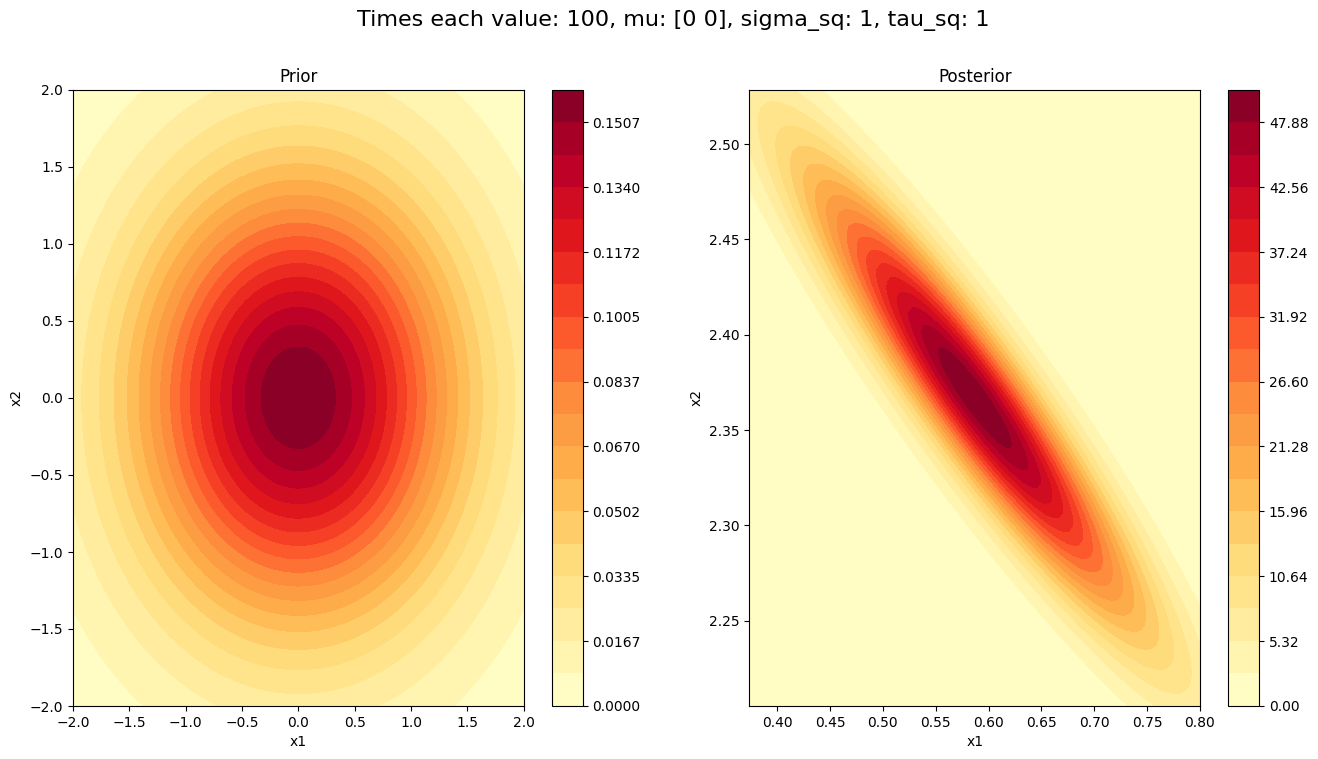

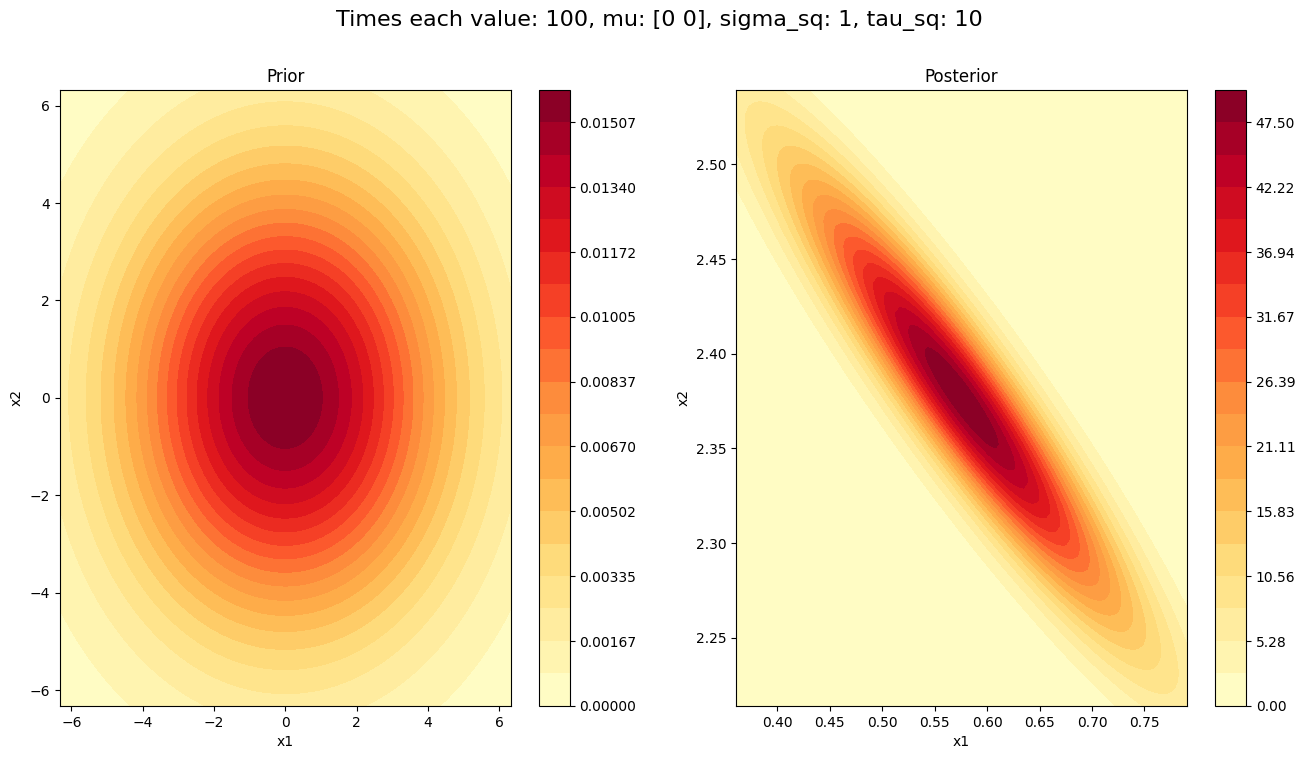

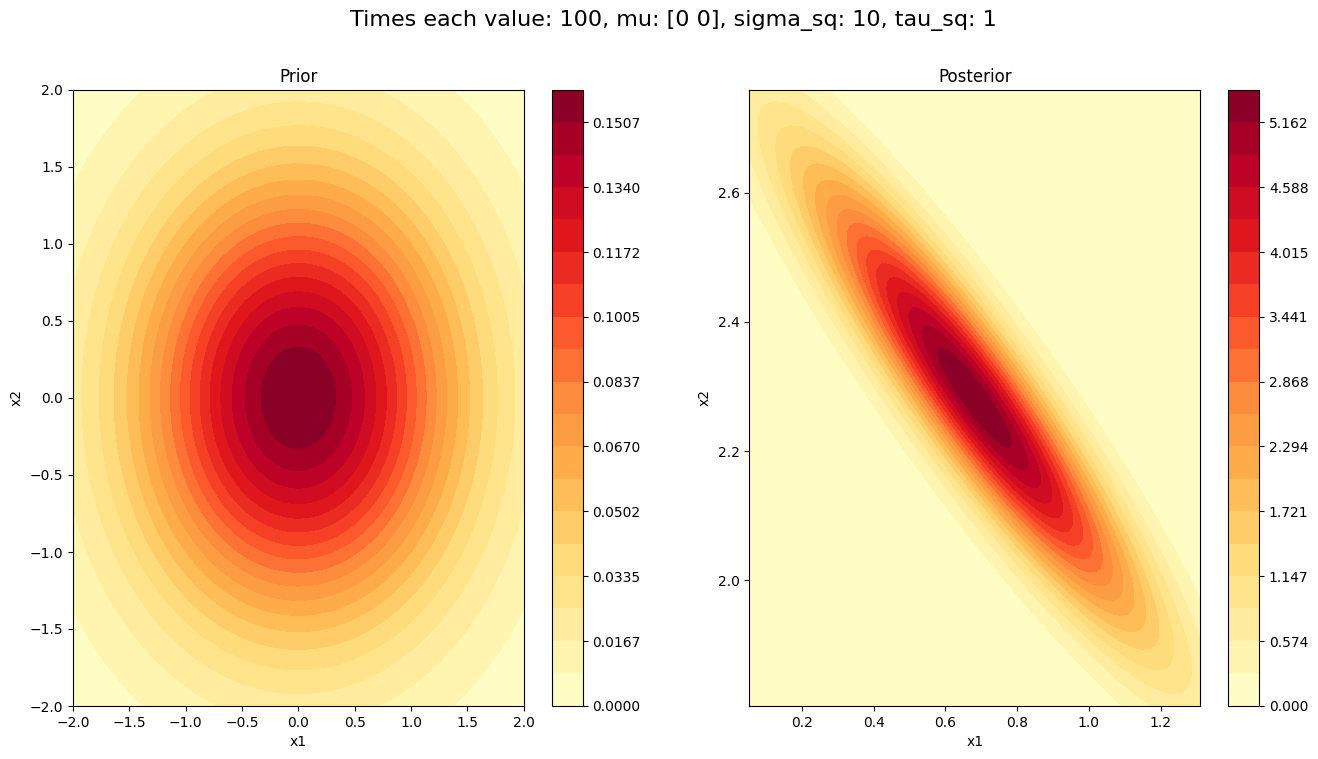

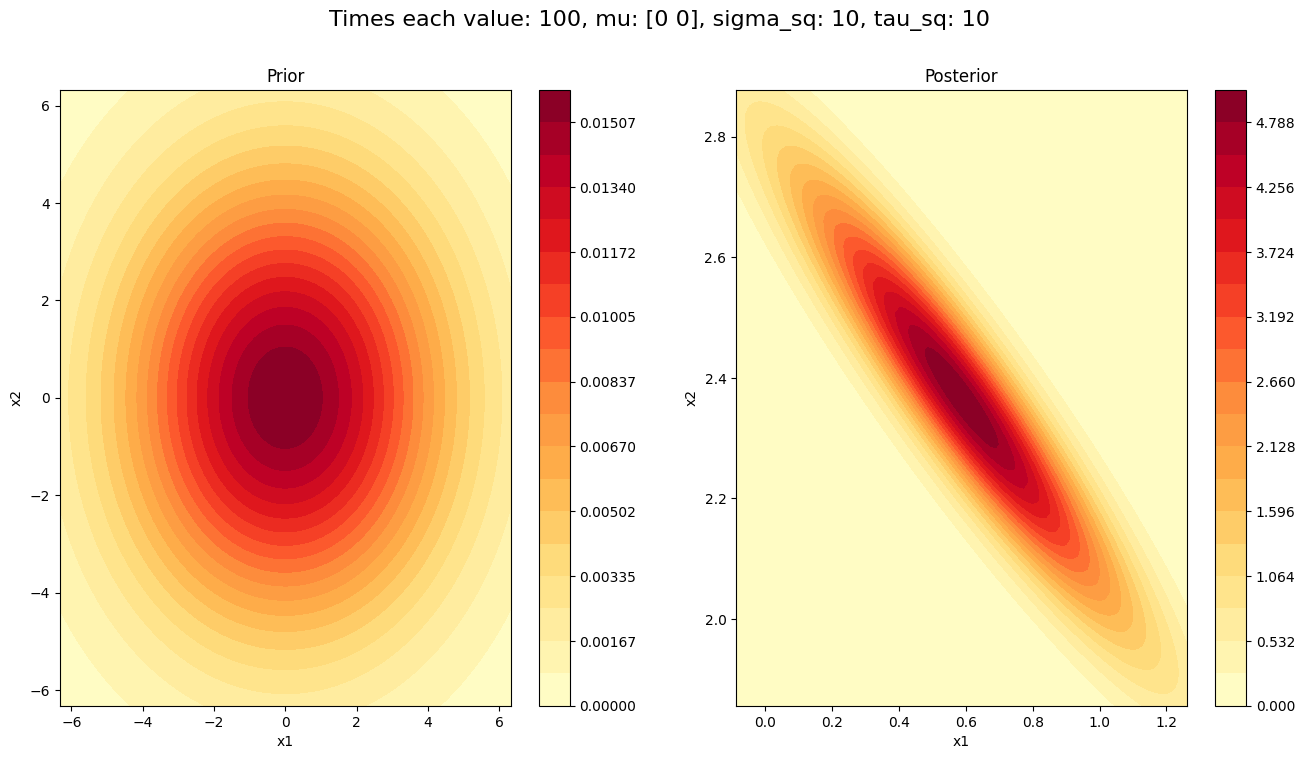

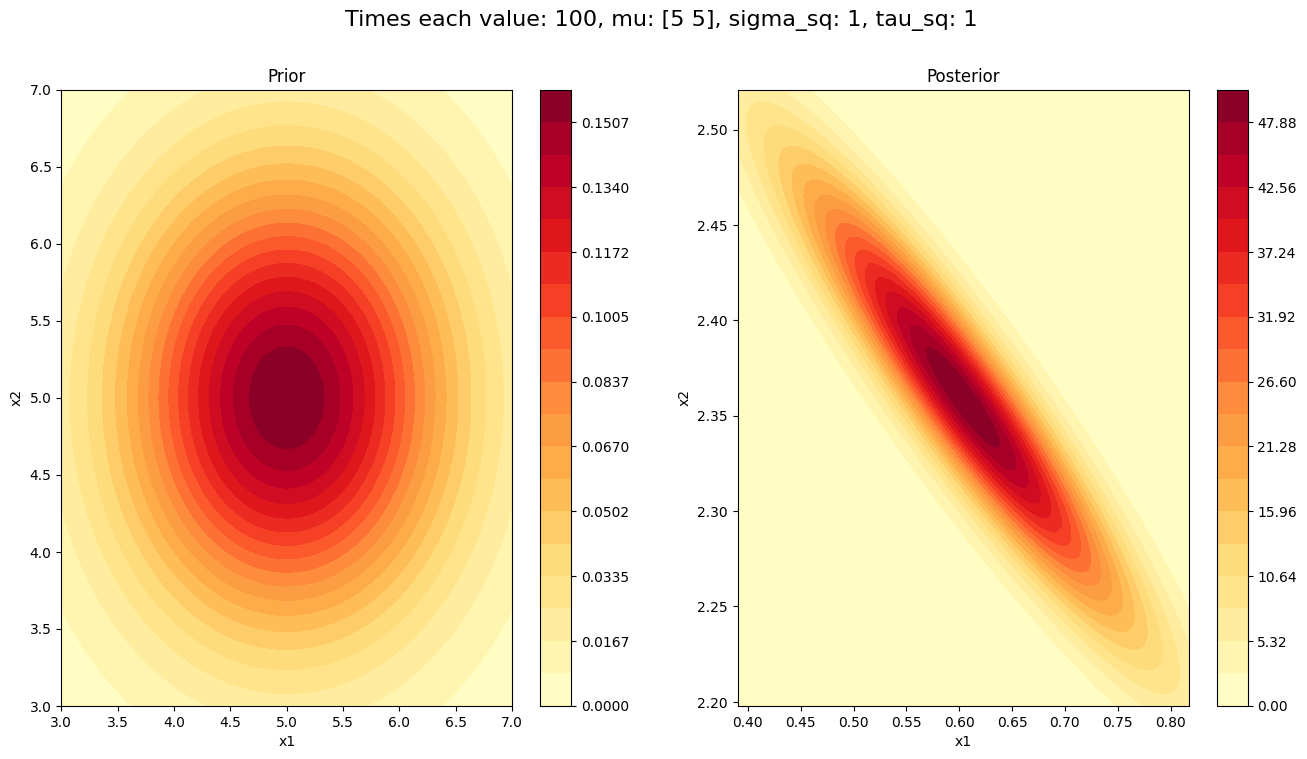

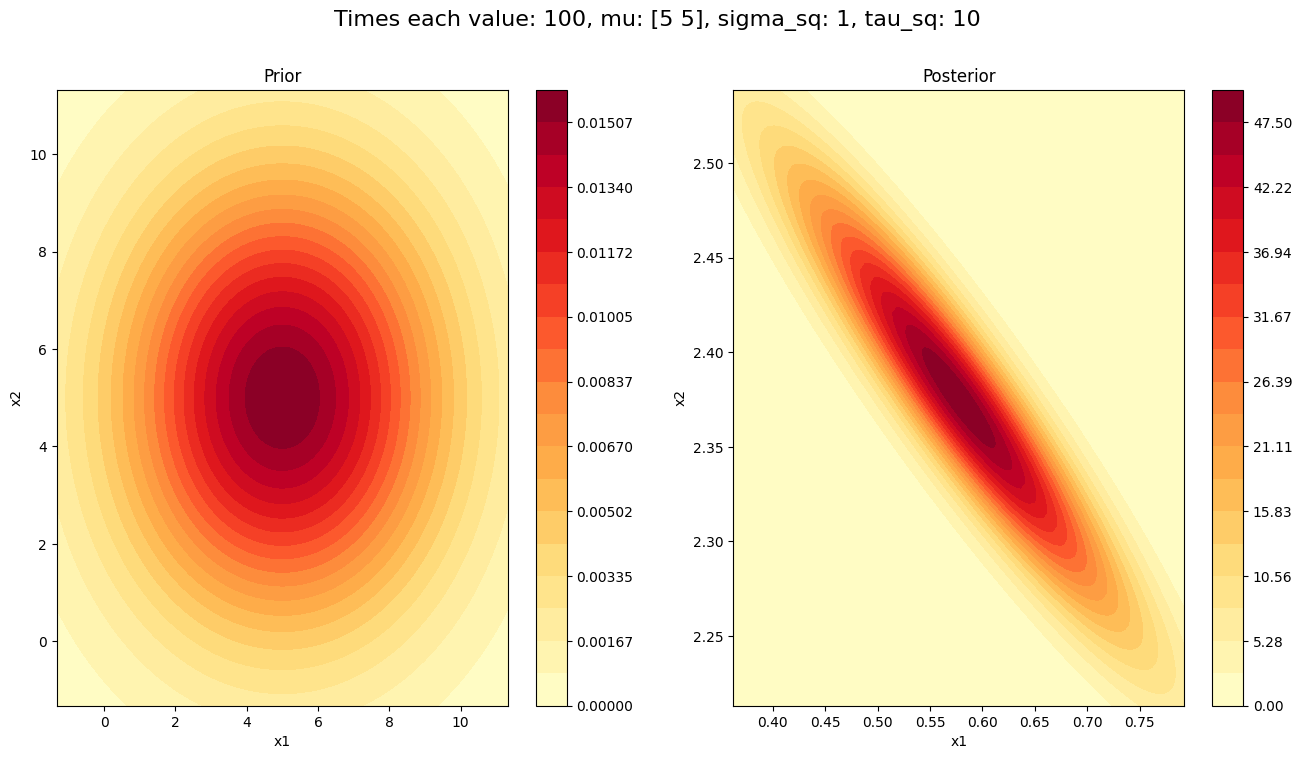

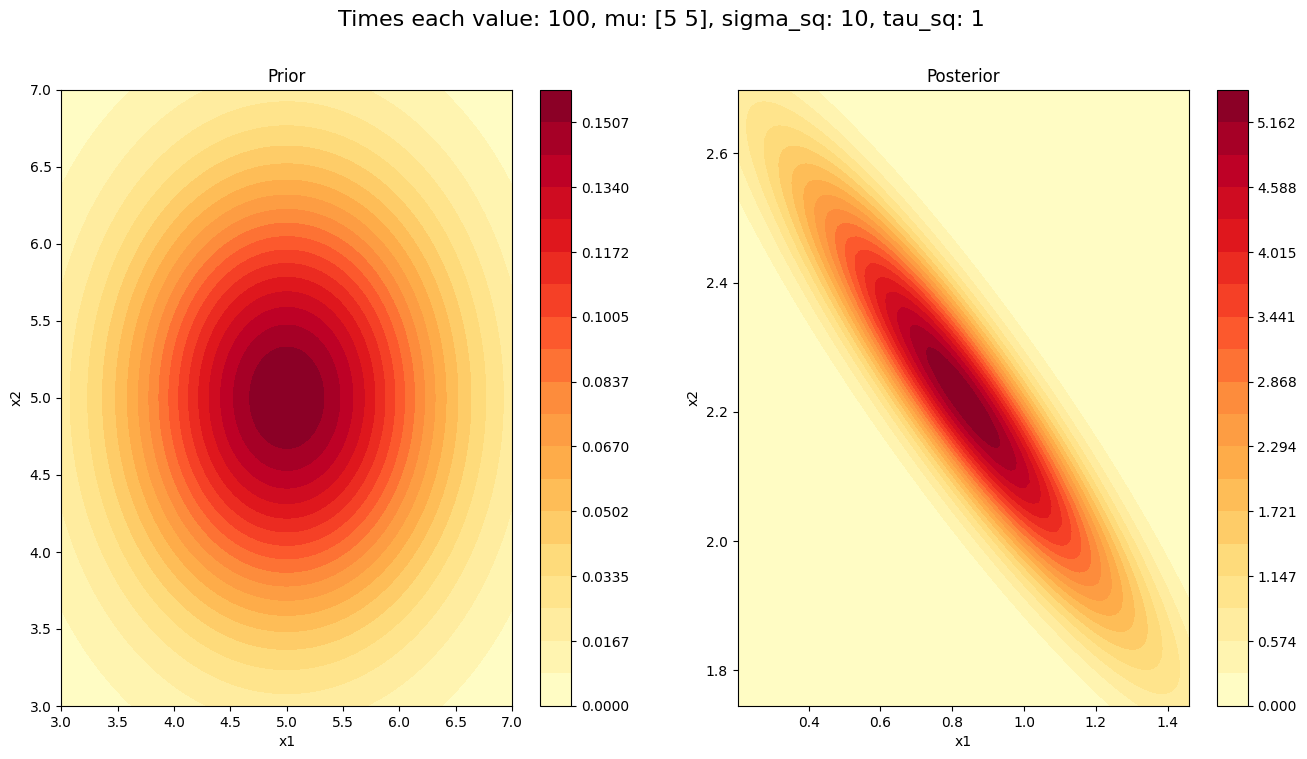

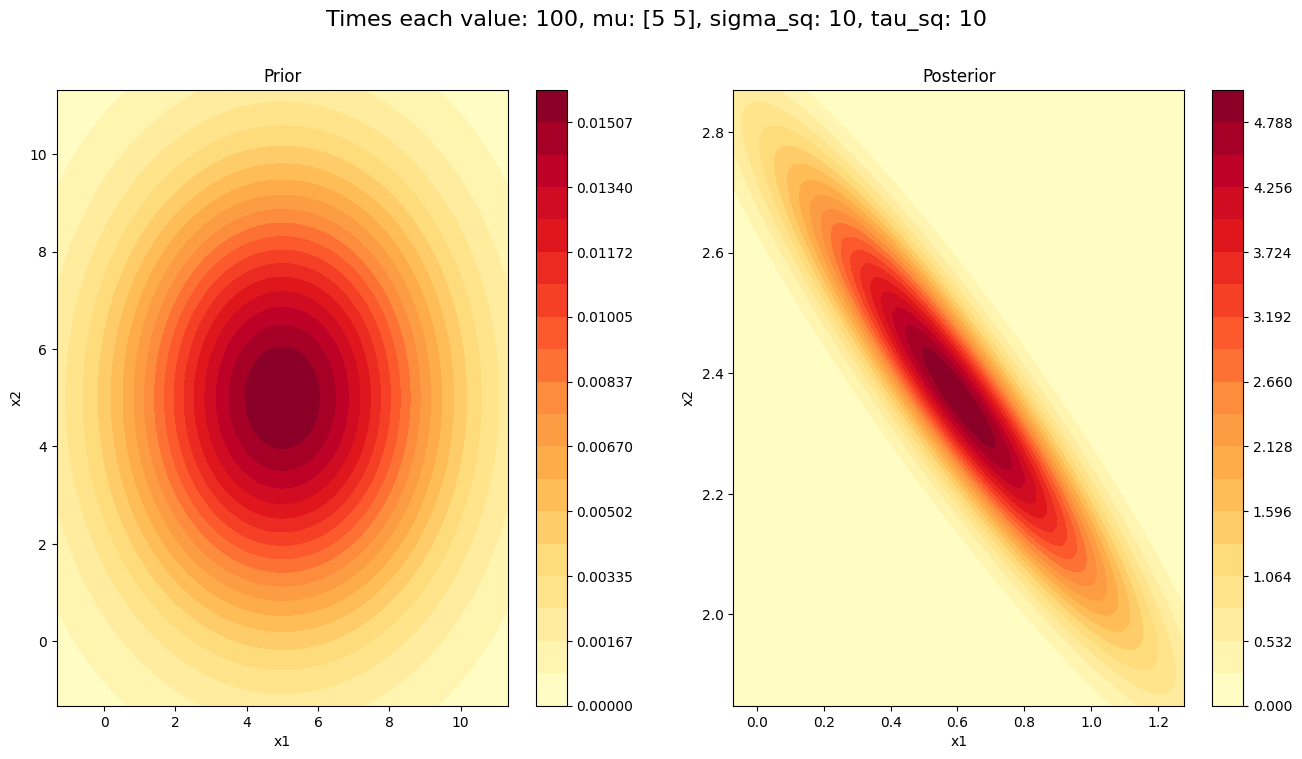

In [11]:
# Cell type : CodeWrite 

# u = [u1, u2]
# w ~ N([u1, u2], t^2 * I)
# e ~ N(0, sigma^2)
# y = w^T * x + e
# cov = (I/t^2 + X^T*X/sigma^2)^-1
# w-posterior ~ N(cov* (u/t^2 + X^T*Y/sigma^2), cov)
"""
NOTE: THIS TAKES 15-25 SECONDS TO RUN
"""

def pdf_multivariate_gaussian(x, mu, cov):
    """
    Returns the probability density function of the multivariate Gaussian distribution.

    Args:
    x: an array of shape (d, 1)
    mu: an array of shape (d, 1)
    cov: an array of shape (d, d)

    Returns:
    p: the probability density function of the multivariate Gaussian distribution
    """
    x_minus_mu = np.array(x - mu)
    x_minus_mu_transpose = np.transpose(x_minus_mu)
    cov_inverse = np.linalg.inv(cov)
    exponent = -0.5 * np.inner(np.matmul(x_minus_mu_transpose, cov_inverse), x_minus_mu)
    const = 1 / (np.sqrt(np.linalg.det(cov) * (2 * np.pi)**(x.shape[0])))
    return const * np.exp(exponent)

# The parameters
X_original = [[1.0, 2.0], [2.0, 2.1], [0.6, 1.5], [1.1, 0.9]]
Y_original = [5.1, 6.1, 4.2, 2.9]
times_each_values = [1, 100]
mu_s = [[0, 0], [5, 5]]
sigma_sqs = [1, 10]
tau_sqs = [1, 10]

for times_each_value in times_each_values:
    # Creating the X and Y matrices
    X = []
    Y = []
    for i in range(len(X_original)):
        for j in range(times_each_value):
            X.append(X_original[i])
            Y.append(Y_original[i])
    X = np.array(X)
    Y = np.array(Y)

    for mu in mu_s:
        for sigma_sq in sigma_sqs:
            for tau_sq in tau_sqs:
                # Getting mu and cov for the prior
                mu = np.array(mu)
                cov = tau_sq * np.eye(2)
                
                # Creating a meshgrid
                X_left_lim = mu[0] - 2 * np.sqrt(cov[0, 0])
                X_right_lim = mu[0] + 2 * np.sqrt(cov[0, 0])
                Y_left_lim = mu[1] - 2 * np.sqrt(cov[1, 1])
                Y_right_lim = mu[1] + 2 * np.sqrt(cov[1, 1])
                size = 100
                X_mesh, Y_mesh  = np.meshgrid(np.linspace(X_left_lim, X_right_lim, size), np.linspace(Y_left_lim, Y_right_lim, size))

                # Flatten the meshgrid
                X_plotter = []
                for i in range(size):
                    for j in range(size):
                        X_plotter.append([X_mesh[i, j], Y_mesh[i, j]])
                X_plotter = np.array(X_plotter)

                # Calculating the pdf
                Z = np.zeros(X_plotter.shape[0])
                for i in range(size):
                    for j in range(size):
                        Z[i*size + j] = pdf_multivariate_gaussian(X_plotter[i * size + j], mu, cov)
                Z = Z.reshape(size, size)

                # Plotting the pdf
                fig, ax = plt.subplots(1, 2, figsize=(16, 8))
                fig.suptitle("Times each value: " + str(times_each_value) + ", mu: " + str(mu) + ", sigma_sq: " + str(sigma_sq) + ", tau_sq: " + str(tau_sq), fontsize=16)

                # Plotting the prior
                max_height = np.max(Z)
                contour = ax[0].contourf(X_mesh, Y_mesh, Z, levels = np.linspace(0, max_height, 20), cmap='YlOrRd')
                ax[0].set_title("Prior")
                ax[0].set_xlabel("x1")
                ax[0].set_ylabel("x2")
                plt.colorbar(contour, ax=ax[0])

                # Getting the mu and cov for the posterior
                cov_posterior = np.linalg.inv(np.add(np.eye(2)/tau_sq, np.matmul(np.transpose(X), X)/sigma_sq))
                mu_posterior = np.matmul(cov_posterior, np.add(mu/tau_sq, np.matmul(np.transpose(X), Y)/sigma_sq))

                # Creating a meshgrid
                X_left_lim = mu_posterior[0] - 2 * np.sqrt(cov_posterior[0, 0])
                X_right_lim = mu_posterior[0] + 2 * np.sqrt(cov_posterior[0, 0])
                Y_left_lim = mu_posterior[1] - 2 * np.sqrt(cov_posterior[1, 1])
                Y_right_lim = mu_posterior[1] + 2 * np.sqrt(cov_posterior[1, 1])
                X_mesh, Y_mesh  = np.meshgrid(np.linspace(X_left_lim, X_right_lim, 100), np.linspace(Y_left_lim, Y_right_lim, 100))

                # Flatten the meshgrid
                X_plotter = []
                for i in range(size):
                    for j in range(size):
                        X_plotter.append([X_mesh[i, j], Y_mesh[i, j]])
                X_plotter = np.array(X_plotter)

                # Calculating the pdf
                Z = np.zeros(X_plotter.shape[0])
                for i in range(size):
                    for j in range(size):
                        Z[i* size + j] = pdf_multivariate_gaussian(X_plotter[i * size + j], mu_posterior, cov_posterior)
                Z = Z.reshape(size, size)

                # Plotting the posterior
                max_height = np.max(Z)
                contour = ax[1].contourf(X_mesh, Y_mesh, Z, levels = np.linspace(0, max_height, 20), cmap='YlOrRd')
                ax[1].set_title("Posterior")
                ax[1].set_xlabel("x1")
                ax[1].set_ylabel("x2")
                plt.colorbar(contour, ax=ax[1])

                # Displaying the plot
                plt.show()

** Cell type : TextWrite **

# Problem 6 : Bayesian Regression

### Prior Distribution

$\mu = \begin{bmatrix} \mu_1 \\ \mu_2 \end{bmatrix}$ <br><br>
$W$ ~ $N(\mu, \tau^2 I)$

### Posterior Distribution

$\Sigma_N^{-1} = \tau^{-2}I + \sigma^{-2}X^TX$ <br><br>
$\mu_N = \Sigma_N(\tau^{-2}\mu + \sigma^{-2}X^TY)$ <br><br>
$W|X,Y$ ~ $N(\mu_N, \Sigma_N)$

### Observations

1. The prior distribution is a Gaussian with mean $\mu$ and covariance $\tau^2 I$. The posterior distribution is also a Gaussian with mean $\mu_N$ and covariance $\Sigma_N$. The mean of the posterior distribution is a weighted average of the prior mean and the mean of the data. The covariance of the posterior distribution is the inverse of the sum of the inverse of the prior covariance and the inverse of the covariance of the data.

2. Once we have the mean and variance of the posterior distribution, we can plot the contours of the distribution. 